# PROJECT NAME: MORTALITY PREDICTION IN IMMUNOCOMPROMISED HIV PATIENTS USING MACHINE LEARNING ~ By supreetha R


## Objectives:
* Indentify the important features associated with the mortality using EDA & visualization

* Building ML models which can accurately predict the mortality

* Comparison of the built models using their evaluatio metrics to choose the best

## Methodology or steps involved to meet the objectives
*Data sampling from UCI ML repository

*Data cleaning or preprocessing:Dropping unwanted columns, creating new columns or derived columns, variable modifications etc.

*Data visualization or EDA: Univariate, Bivariate & Multivariate analysis using charts

*Outlier treatment

*Feature engineering & data balancing : Scaling, creating dummy variables, data balancing using SMOTE

*Feature selection techniques

*Model selection and model building

*Hyperparameter tuning

*Model evaluation


## DATA SAMPLING
* The dataset for our project is extracted from the UCI Machine learning repository in the following way
* Link for the dataset: https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

In [1]:
#Installing the ucimlrepository in our system
!pip install ucimlrepo

In [2]:
# Listing the datasets available in the uciml repository
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [3]:
# import dataset
hiv = fetch_ucirepo(id=890)
hiv

{'data': {'ids':       pidnum
  0      10056
  1      10059
  2      10089
  3      10093
  4      10124
  ...      ...
  2134  990021
  2135  990026
  2136  990030
  2137  990071
  2138  990077
  
  [2139 rows x 1 columns],
  'features':       time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
  0      948    2   48   89.8128     0     0      0     100       0    0  ...   
  1     1002    3   61   49.4424     0     0      0      90       0    1  ...   
  2      961    3   45   88.4520     0     1      1      90       0    1  ...   
  3     1166    3   47   85.2768     0     1      0     100       0    1  ...   
  4     1090    0   43   66.6792     0     1      0     100       0    1  ...   
  ...    ...  ...  ...       ...   ...   ...    ...     ...     ...  ...  ...   
  2134  1091    3   21   53.2980     1     0      0     100       0    1  ...   
  2135   395    0   17  102.9672     1     0      0     100       0    1  ...   
  2136  1104    2   53   69.8544  

In [14]:
# Extracting the original dataset 
df = hiv['data']['original']
df

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,Preanti
0,10056,0,948,2,48,89.8128,0,0,0,100,...,0,1,0,1,0,422,477,566,324,0.0
1,10059,1,1002,3,61,49.4424,0,0,0,90,...,1,3,0,1,0,162,218,392,564,2.0
2,10089,0,961,3,45,88.4520,0,1,1,90,...,1,3,0,1,1,326,274,2063,1893,2.0
3,10093,0,1166,3,47,85.2768,0,1,0,100,...,1,3,0,1,0,287,394,1590,966,4.0
4,10124,0,1090,0,43,66.6792,0,1,0,100,...,1,3,0,0,0,504,353,870,782,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,990021,0,1091,3,21,53.2980,1,0,0,100,...,1,3,0,1,1,152,109,561,720,2.0
2135,990026,0,395,0,17,102.9672,1,0,0,100,...,1,3,0,0,1,373,218,1759,1030,1.0
2136,990030,0,1104,2,53,69.8544,1,1,0,90,...,1,3,0,1,0,419,364,1391,1041,2.0
2137,990071,1,465,0,14,60.0000,1,0,0,100,...,0,1,0,0,0,166,169,999,1838,0.0


In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### INITIAL DATA EXPLORATION

In [16]:
df.shape

(2139, 26)

In [17]:
df.columns

Index(['pidnum', 'cid', 'time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs',
       'karnof', 'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender',
       'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80',
       'cd820', 'Preanti'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pidnum   2139 non-null   int64  
 1   cid      2139 non-null   int64  
 2   time     2139 non-null   int64  
 3   trt      2139 non-null   int64  
 4   age      2139 non-null   int64  
 5   wtkg     2139 non-null   float64
 6   hemo     2139 non-null   int64  
 7   homo     2139 non-null   int64  
 8   drugs    2139 non-null   int64  
 9   karnof   2139 non-null   int64  
 10  oprior   2139 non-null   int64  
 11  z30      2139 non-null   int64  
 12  zprior   2139 non-null   int64  
 13  preanti  2139 non-null   int64  
 14  race     2139 non-null   int64  
 15  gender   2139 non-null   int64  
 16  str2     2139 non-null   int64  
 17  strat    2139 non-null   int64  
 18  symptom  2139 non-null   int64  
 19  treat    2139 non-null   int64  
 20  offtrt   2139 non-null   int64  
 21  cd40     2139 

In [19]:
df.describe()

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,Preanti
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,248778.252454,0.243572,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,1.007480
std,234237.289399,0.429338,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,1.259924
min,10056.000000,0.000000,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,81446.500000,0.000000,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,190566.000000,0.000000,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,280277.000000,0.000000,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,2.000000
max,990077.000000,1.000000,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,4.000000


In [20]:
df.isna().sum()

pidnum     0
cid        0
time       0
trt        0
age        0
wtkg       0
hemo       0
homo       0
drugs      0
karnof     0
oprior     0
z30        0
zprior     0
preanti    0
race       0
gender     0
str2       0
strat      0
symptom    0
treat      0
offtrt     0
cd40       0
cd420      0
cd80       0
cd820      0
Preanti    0
dtype: int64

#### Insights
* The dataset contains 2139 rows and 25 features, all the features are integers except for wtkg

* We can see that the dataset is free from the missing values

# DATA PREPROCESSING

* This section includes dropping the unwanted features from the dataset, deriving new columns from the existing variables,transforming the data.

* We are not checking the outliers in this section instead it will be done in visualization section.

### Preanti

* This variable represents the number of days the subjects were on ART before participating in trial

* It is difficult to analyze when represented in days, therefore we will convert into years for our convenience

* When we check the value conts of preanti, values >4 are quite less when compared to those <3.0, therefore those values>=4 are represented as 4

In [21]:
# Let's represent the preanti in years instead of days
df['Preanti'] = round(df['preanti']/365)
df['Preanti'].value_counts()

Preanti
0.0    1119
1.0     341
2.0     337
3.0     228
4.0      79
5.0      28
6.0       4
7.0       2
8.0       1
Name: count, dtype: int64

In [22]:
# There are some who were on ART for >3 years before trial, let's represent them as >3 
df['Preanti'] = df['Preanti'].apply(lambda x: 4 if x > 3 else x)


In [23]:
df['Preanti'].value_counts()

Preanti
0.0    1119
1.0     341
2.0     337
3.0     228
4.0     114
Name: count, dtype: int64

#### Time

* The time variable indicates the duration until which the subject remained in the trial or until death. It is represented in days

* For better analysis we are going to represent it in years

In [24]:
df['Time'] = round(df['time']/365)
df['Time'].value_counts()

Time
3.0    1361
2.0     407
1.0     320
0.0      51
Name: count, dtype: int64

* As we can most of the subjects stayed until completion except for few, who might have discontinued within a year or after a year

## What are cd4 and cd8 cells in HIV? why is CD4/CD8 ratio important?

* HIV causes changes in the numbers of two types of T-lymphocytes, CD4 cells and CD8 cells. HIV infects and kills CD4 cells. 
* CD8 cells proliferate in response to HIV, seeking out cells infected with HIV and killing them.
* As CD4 numbers decline, the ratio of CD4 cells to CD8 cells will decline too, from a normal range between 1 and 3 to below 1.
* When the CD4/CD8 ratio falls below 1, it means there is more than one CD8 cell for every CD4 cell in a millilitre of blood.
* In advanced HIV, when the CD4 count falls below 200, the CD4/CD8 ratio may fall below 0.3.
* When people begin taking ART, their CD4 counts begin to rise. In the majority of people who start treatment with advanced HIV, the CD4 count returns to a normal level (above 500) after several years. 
* The CD4/CD8 ratio may also return to normal, but it can take a long time and not everyone who experiences a healthy CD4 count increase will see the return of their CD4/CD8 ratio to a normal level. 
* ref: https://www.aidsmap.com/news/feb-2024/cd4cd8-ratio-useful-test-people-hiv 

* ref: https://pmc.ncbi.nlm.nih.gov/articles/PMC5667733/


#### cd4/cd8 ratio
 
cd4/cd8 ratio represents the immune status of the person. If the ratio is -

* Between 1 and 3: Normal (Healthy individuals),
    
* <1 :  disease progression, mortality, or low immunity
    
* and >3 : immune dysregulation

In [25]:
# Let's create two columns representing the cd4 and cd8 ratio
df['cd480_ratio'] = round(df['cd40']/df['cd80'])
df['cd4820_ratio'] = round(df['cd420']/df['cd820'])
df.columns

Index(['pidnum', 'cid', 'time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs',
       'karnof', 'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender',
       'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80',
       'cd820', 'Preanti', 'Time', 'cd480_ratio', 'cd4820_ratio'],
      dtype='object')

In [26]:
df['cd480_ratio'].value_counts()

cd480_ratio
0.0     1551
1.0      581
2.0        5
10.0       1
3.0        1
Name: count, dtype: int64

In [27]:
df['cd4820_ratio'].value_counts()

cd4820_ratio
0.0    1372
1.0     756
2.0      11
Name: count, dtype: int64

* The 'cd480_ratio' feature has an outlier value '10' which is seen in rare cases.

* Therefore we will replace it with normal range which is 1

In [28]:
# Replacing the outlier 10 with 1
df['cd480_ratio'].replace(10.0, 1.0, inplace=True)

In [29]:
df['cd480_ratio'].value_counts()

cd480_ratio
0.0    1551
1.0     582
2.0       5
3.0       1
Name: count, dtype: int64

In [30]:
# How many censored or died inspite of having a normal cd480 ratio
df[(df['cd480_ratio']>1) & (df['cid']==1)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,treat,offtrt,cd40,cd420,cd80,cd820,Preanti,Time,cd480_ratio,cd4820_ratio
1417,251020,1,391,2,32,71.2152,0,1,0,90,...,1,1,189,265,116,680,1.0,1.0,2.0,0.0
2036,920047,1,567,3,48,81.1944,1,0,0,100,...,1,1,461,294,177,220,0.0,2.0,3.0,1.0


In [31]:
# How many censored or died inspite of having a normal cd480 ratio
df[(df['cd4820_ratio']>1) & (df['cid']==1)]

,pidnum,cid,time,trt,age,wtkg,hemo,homo,drugs,karnof,...,treat,offtrt,cd40,cd420,cd80,cd820,Preanti,Time,cd480_ratio,cd4820_ratio
59,10950,1,727,1,26,92.62512,0,0,0,100,...,1,1,421,546,337,341,0.0,2.0,1.0,2.0


* 2 subjects had died or censored inspite of having a cd480 ratio >1, 1 subject having a c4820 ratio of >1.

#### Removing unwanted features

* pidnum = It's an id column 
* time & preanti = Redundant since we derived new columns from them represented in years
* zprior = It lacks variability, because all the subjects have had zidovudine prior to participation in trial
* str2 = It is redundant as the information is already present in 'strat
* treat = It is redundant as the information is already present in 'trt'

In [32]:
# Removing the above mentioned columns
df = df.drop(['pidnum','time','zprior','str2','treat','preanti'], axis=1)
df.columns

Index(['cid', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'race', 'gender', 'strat', 'symptom', 'offtrt', 'cd40',
       'cd420', 'cd80', 'cd820', 'Preanti', 'Time', 'cd480_ratio',
       'cd4820_ratio'],
      dtype='object')

# DATA VISUALIZATION

### UNIVARIATE ANALYSIS

* In this section each variable is checked for its distribution and anomalies

* The categorical and numerical variables are explored separately to ease the visualization process as well as to identify the outliers.

In [33]:
# Let's separate the categorical variables and plot them 
imp_cols = df[['cid','hemo','homo','drugs','oprior','trt','strat','z30','race','gender','symptom','karnof','offtrt','cd480_ratio','cd4820_ratio', 'Time','Preanti']]

In [34]:
df['Preanti'].value_counts()/ df.shape[0]

Preanti
0.0    0.523142
1.0    0.159420
2.0    0.157550
3.0    0.106592
4.0    0.053296
Name: count, dtype: float64

In [35]:
df.age.max()

70

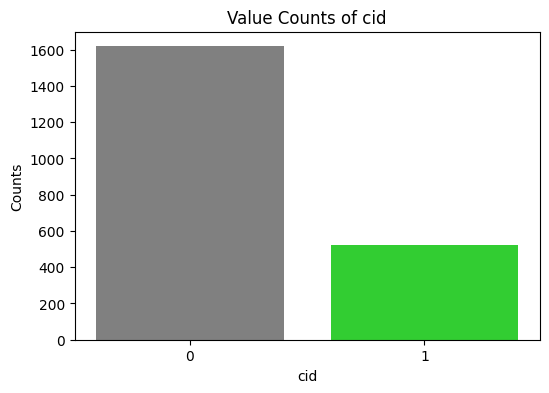

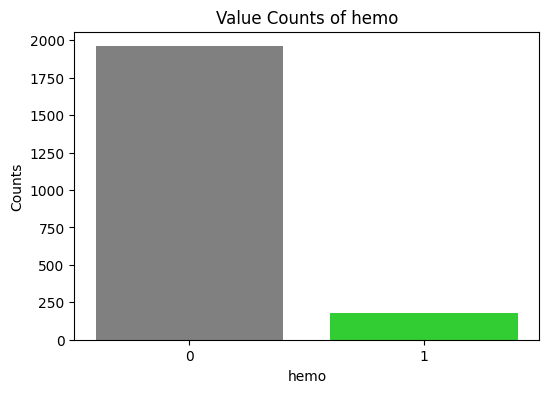

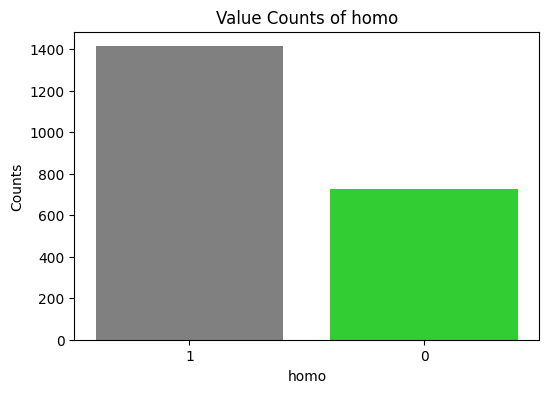

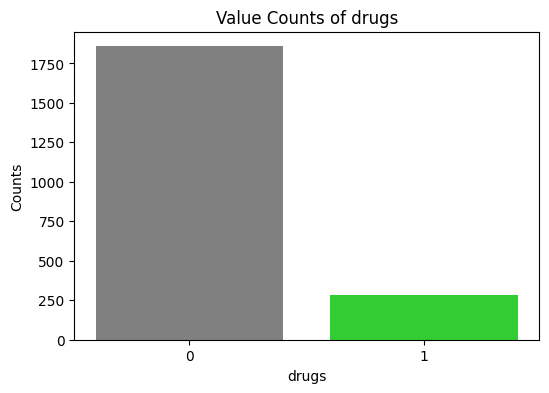

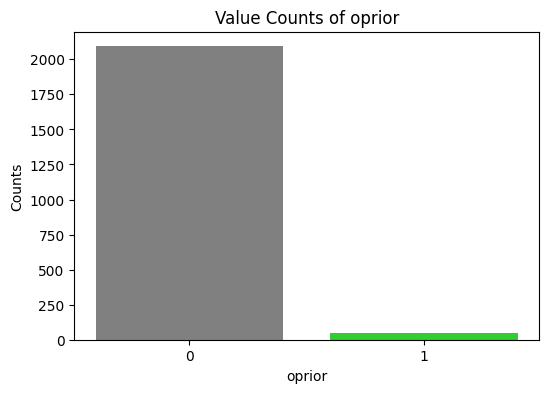

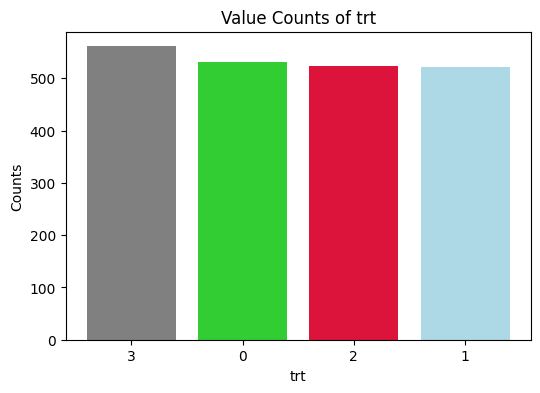

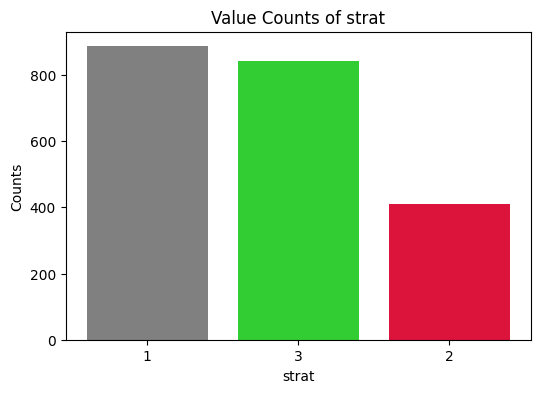

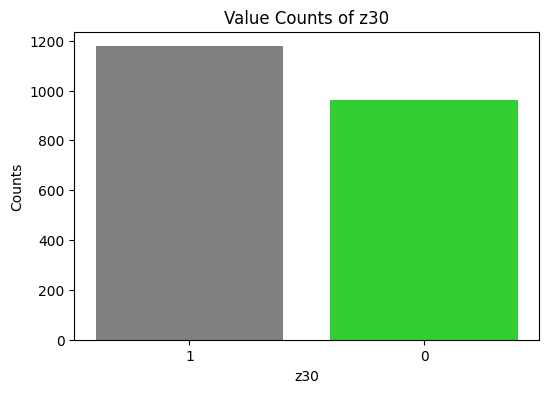

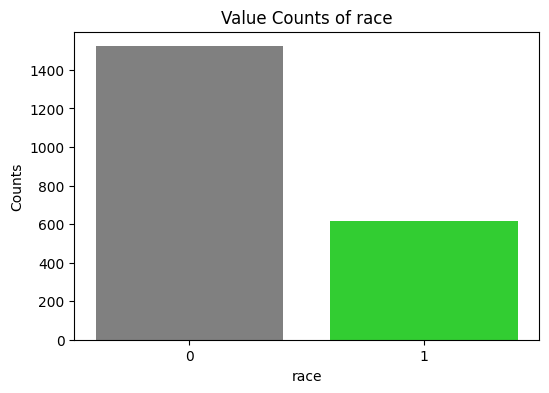

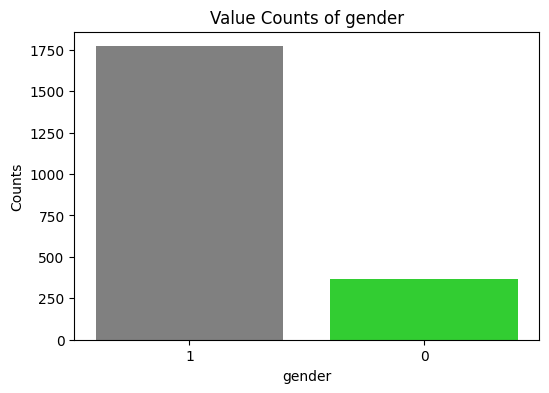

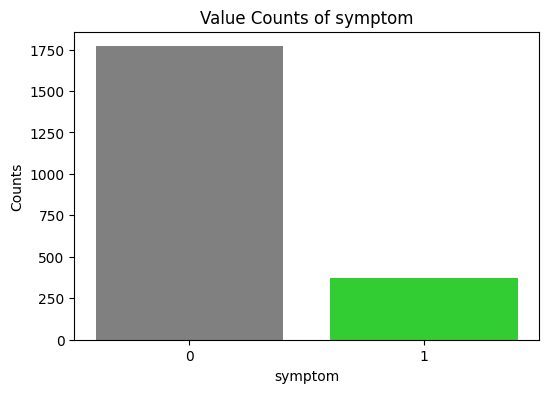

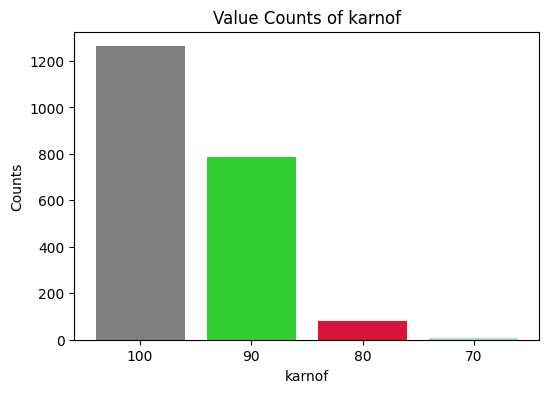

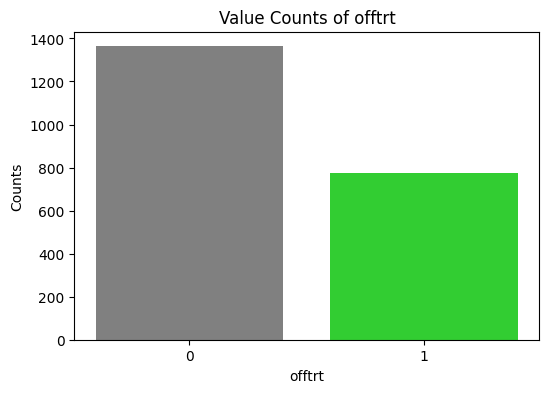

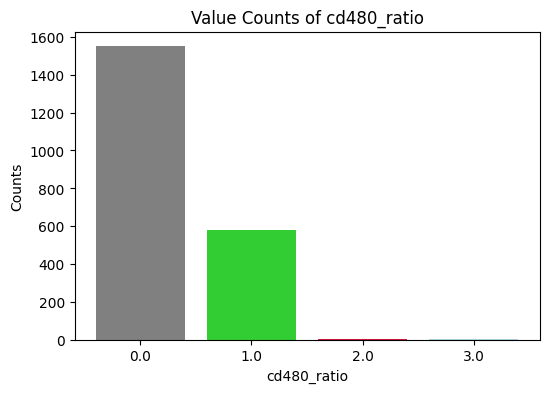

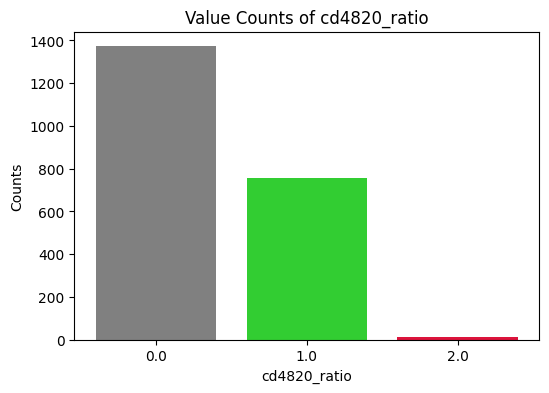

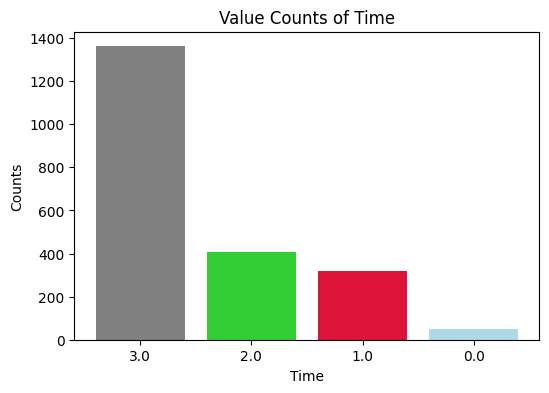

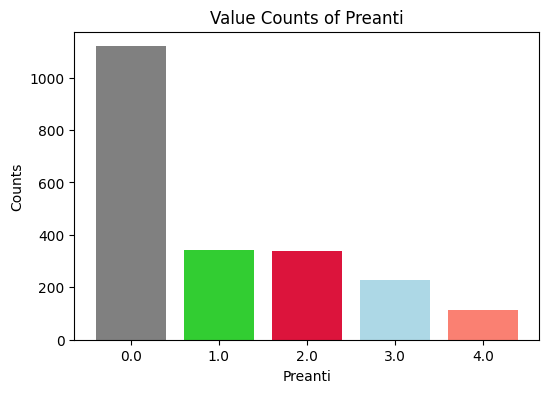

In [36]:
for column in imp_cols.columns:
    value_counts = imp_cols[column].value_counts()
    
    # Plot the bar chart
    plt.figure(figsize=(6, 4))  # Adjust figure size if needed
    plt.bar(value_counts.index.astype(str), value_counts.values, color=['grey','limegreen','crimson','lightblue','salmon','purple'])
    plt.title(f'Value Counts of {column}')
    plt.xlabel(column)
    plt.ylabel('Counts')
    plt.show()

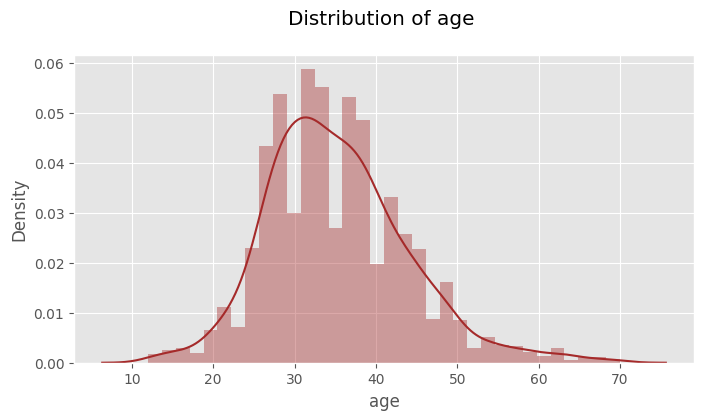

In [37]:
# Let's see how the age is distributed
plt.style.use('ggplot')
plt.figure(figsize=(8,4))
plt.title('Distribution of age \n')
sns.distplot(df.age,color='brown')
plt.show()

In [38]:
df[df['age']<15]

,cid,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,symptom,offtrt,cd40,cd420,cd80,cd820,Preanti,Time,cd480_ratio,cd4820_ratio
1676,0,1,14,65.00000,1,0,0,100,0,1,...,0,0,374,451,707,676,1.0,3.0,1.0,1.0
2014,0,2,13,32.65920,1,0,0,100,0,1,...,1,1,265,434,434,993,2.0,3.0,1.0,0.0
2039,0,3,14,54.20520,1,0,0,100,0,1,...,0,0,290,300,1200,960,2.0,3.0,0.0,0.0
2051,0,3,12,41.40000,1,0,0,100,0,0,...,0,0,301,390,314,457,0.0,3.0,1.0,1.0
2052,0,2,13,62.86896,1,0,0,100,0,0,...,0,1,445,286,810,678,1.0,1.0,1.0,0.0
2062,0,3,14,41.05080,1,0,0,100,0,0,...,0,0,516,734,1081,1403,0.0,3.0,0.0,1.0
2069,0,1,12,53.10000,1,0,0,100,0,1,...,0,0,328,826,712,1582,2.0,3.0,0.0,1.0
2072,1,1,12,31.00000,1,0,0,100,0,1,...,0,1,187,116,176,124,4.0,1.0,1.0,1.0
2073,1,3,14,64.30000,1,0,0,100,0,1,...,0,1,383,281,1043,1251,1.0,2.0,0.0,0.0
2088,0,0,13,48.53520,1,0,0,100,0,0,...,1,1,283,271,457,767,0.0,1.0,1.0,0.0


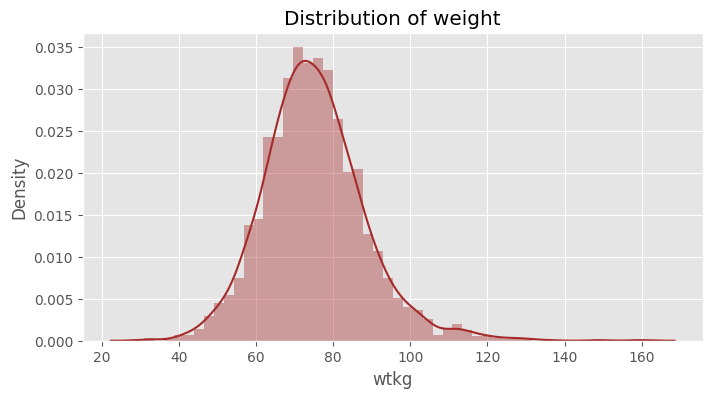

In [39]:
# Let's see how the wtkg is distributed
plt.style.use('ggplot')
plt.figure(figsize=(8,4))
plt.title('Distribution of weight')
sns.distplot(df.wtkg,color='brown')
plt.show()

In [40]:
df[df['wtkg']<40]

,cid,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,symptom,offtrt,cd40,cd420,cd80,cd820,Preanti,Time,cd480_ratio,cd4820_ratio
1931,0,2,30,36.78696,0,1,0,90,0,0,...,0,1,222,189,666,544,0.0,1.0,0.0,0.0
2014,0,2,13,32.65920,1,0,0,100,0,1,...,1,1,265,434,434,993,2.0,3.0,1.0,0.0
2072,1,1,12,31.00000,1,0,0,100,0,1,...,0,1,187,116,176,124,4.0,1.0,1.0,1.0


#### Checking the numerical columns for outliers

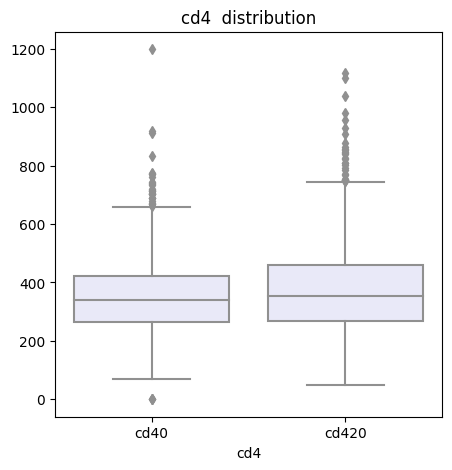

In [41]:
# Checking outliers in preanti using boxplot
plt.figure(figsize=[5,5])
plt.style.use('default')
sns.boxplot(df[['cd40','cd420']], color='lavender')
plt.title('cd4  distribution')
plt.xlabel('cd4')
plt.show()

In [42]:
df[df['cd40']==0]

,cid,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,symptom,offtrt,cd40,cd420,cd80,cd820,Preanti,Time,cd480_ratio,cd4820_ratio
216,0,1,45,67.1000,0,1,0,100,0,1,...,0,0,0,359,468,659,4.0,3.0,0.0,1.0
217,0,1,60,51.6000,0,0,0,100,0,1,...,0,1,0,523,1087,1727,4.0,3.0,0.0,0.0
723,0,1,30,81.1944,0,1,1,100,0,0,...,0,1,0,566,998,1078,0.0,3.0,0.0,1.0


In [43]:
df[df['cd40']>800]

,cid,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,symptom,offtrt,cd40,cd420,cd80,cd820,Preanti,Time,cd480_ratio,cd4820_ratio
425,0,1,33,55.7928,0,1,0,100,0,1,...,0,0,834,549,3389,1019,3.0,3.0,0.0,1.0
1144,0,1,33,76.2048,0,1,0,90,0,0,...,0,1,1199,565,509,348,0.0,2.0,2.0,2.0
1481,0,2,29,70.8000,0,1,0,100,0,0,...,0,1,918,576,2793,1237,0.0,3.0,0.0,0.0
2138,0,3,45,77.3000,1,0,0,100,0,0,...,0,0,911,930,885,526,0.0,3.0,1.0,2.0


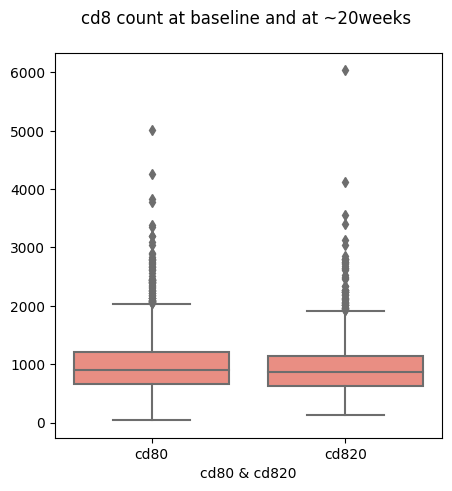

In [44]:
# Checking outliers in cd8 and cd820 using boxplot
plt.figure(figsize=[5,5])
plt.style.use('default')
sns.boxplot(df[['cd80','cd820']], color='salmon')
plt.title('cd8 count at baseline and at ~20weeks \n')
plt.xlabel('cd80 & cd820')
plt.show()

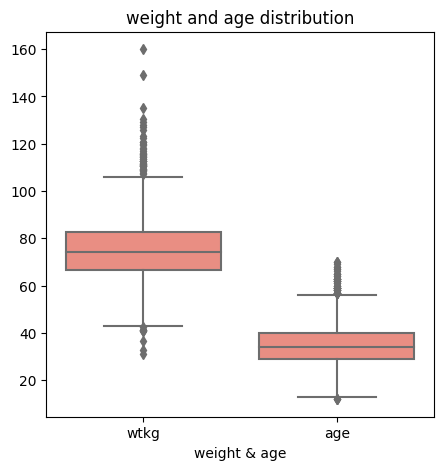

In [45]:
# Checking outliers in weight and age columns using boxplot
plt.figure(figsize=[5,5])
plt.style.use('default')
sns.boxplot(df[['wtkg','age']], color='salmon')
plt.title('weight and age distribution')
plt.xlabel('weight & age')
plt.show()

### Insights from Univariate analysis

* Outliers are present in almost all the numerical variables
* Most of the subjects participated in the trial are between the age 25-45, min is  13, maximum is 70.
* Target variable 'cid' is highly imbalanced since the death number is low.
* Out of all the subjects participated in trial, only 200 of them are hemolytic patients
* ~50 subjects had taken non zidovudine ART treatment prior to the participation in trial
* The patients were evenly distributed to the treatment groups
* Number of subjects who are new to ART and those who took ART for >52 weeks are greater than those who took ART for <52 weeks. 
* ~ 1200 of subjects took zidovudine treatment, ~1000 subjects did not take zidovudine treatment 30 days prior to trial
* ~ 600 subjects were non-white  and the remaining were white
* 368 were females and the remaining were males
* ~370 of the patients were symptomatic remaining were asymptomatic
* ~1200 of subjects had karnofsky score of 100, ~700 had a score of 90, and only a few had scores of 80 and 70.
* ~700 were offtrt 96+/-5 weeks of the trial and the rest remained on the treatment until the end.


### BIVARIATE ANALYSIS

<Figure size 800x400 with 0 Axes>

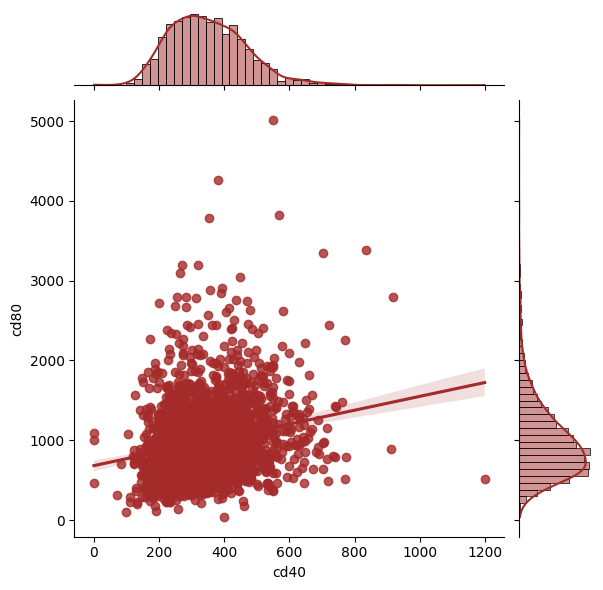

In [46]:
# Let's see the relationship between cd4 and cd8 counts
plt.figure(figsize=(8,4))
plt.style.use('seaborn-v0_8-deep')
sns.jointplot(x='cd40', y = 'cd80', data=df,kind='reg', color='Brown')
plt.xlabel('cd40')
plt.ylabel('cd80')
plt.show()

<Figure size 800x400 with 0 Axes>

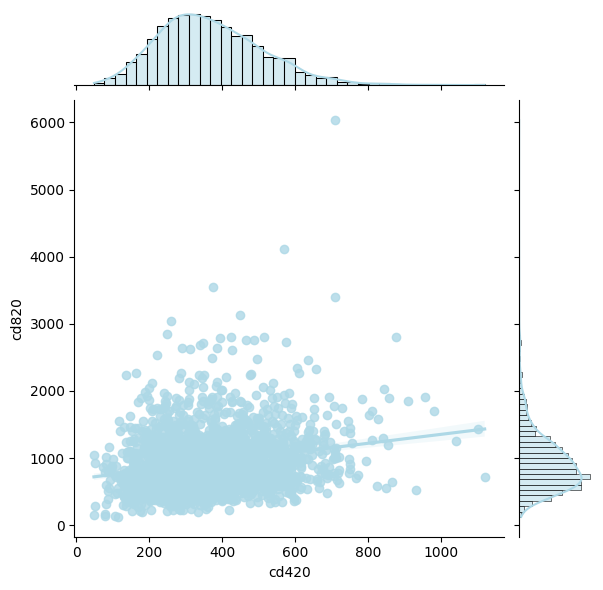

In [47]:
# Let's check the relationship of cd420 with cd820
plt.figure(figsize=(8,4))
plt.style.use('seaborn-v0_8-deep')
sns.jointplot(x='cd420', y = 'cd820', data=df,kind='reg', color='lightblue')
plt.xlabel('cd420')
plt.ylabel('cd820')
plt.show()

Text(0.5, 0, 'Average cd4 count after 20 weeks \n')

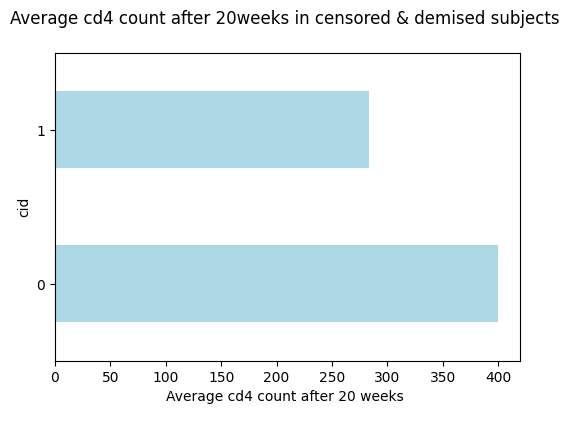

In [48]:
# numerical v/s categorical

# Let's see the relationship of cd40 count with the mortality
plt.figure(figsize=(6,4))
plt.style.use('default')
df.groupby('cid')['cd420'].mean().plot.barh(color='lightblue')
plt.title('Average cd4 count after 20weeks in censored & demised subjects \n')
plt.xlabel('Average cd4 count after 20 weeks \n')

Text(0.5, 0, 'age')

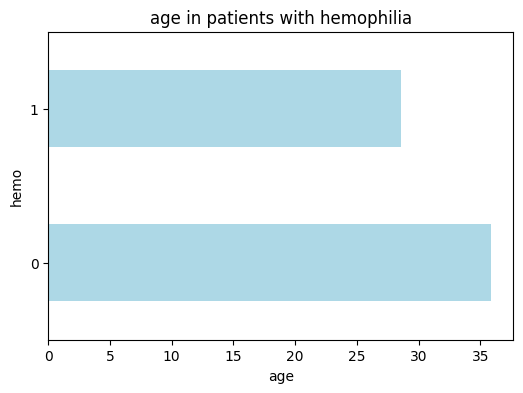

In [49]:
# Let's see the age of patients who had hemophilia
plt.figure(figsize=(6,4))
plt.style.use('default')
df.groupby('hemo')['age'].mean().plot.barh(color='lightblue')
plt.title('age in patients with hemophilia')
plt.xlabel('age')

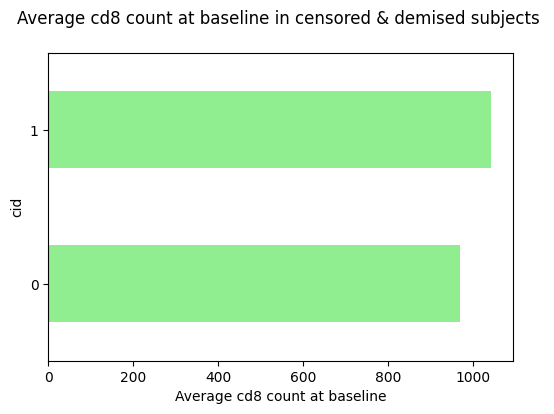

In [50]:
# Let's see the relationship of cd80 count with the mortality
plt.figure(figsize=(6,4))
plt.style.use('default')
df.groupby('cid')['cd80'].mean().plot.barh(color='lightgreen')
plt.title('Average cd8 count at baseline in censored & demised subjects \n')
plt.xlabel('Average cd8 count at baseline')
plt.show()

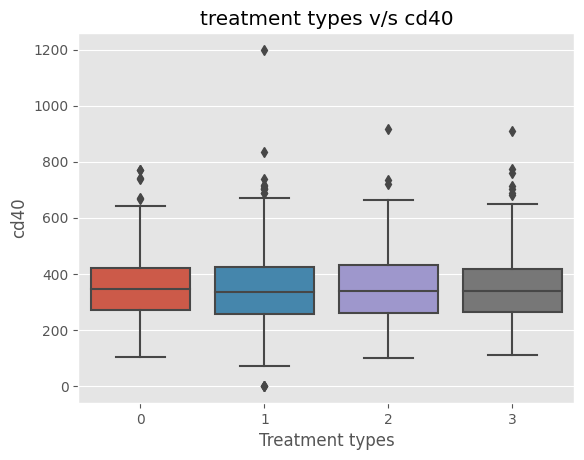

In [51]:
# Let's check the cd4 counts in each treatment group
plt.style.use('ggplot')
sns.boxplot(data=df, x='trt',y='cd40')
plt.title('treatment types v/s cd40')
plt.xlabel('Treatment types')
plt.show()

#### Mortality with treatment types

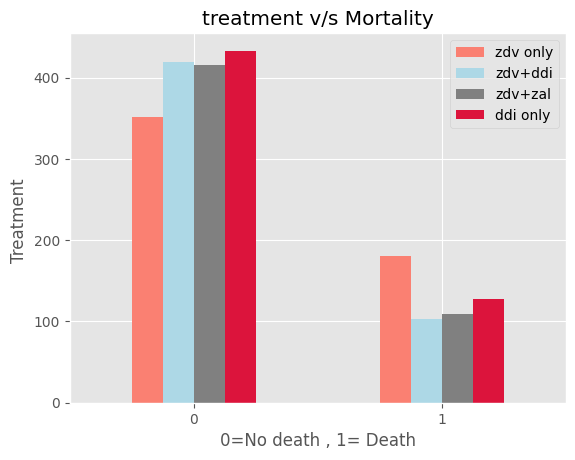

In [52]:
# Let's see the Mortality associated with each treatment groups
pd.crosstab(df.cid, df.trt).plot(kind='bar', color=['salmon', 'lightblue','Grey','Crimson'])
plt.title('treatment v/s Mortality')
plt.xlabel("0=No death , 1= Death")
plt.ylabel('Treatment ')
plt.legend(['zdv only','zdv+ddi','zdv+zal','ddi only'])
plt.xticks(rotation=0);
plt.show()

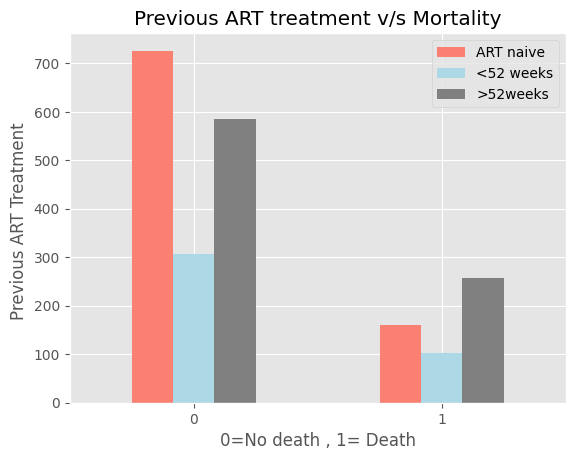

In [53]:
# Let's see the Mortality associated with previous ART treatment
pd.crosstab(df.cid, df.strat).plot(kind='bar', color=['salmon', 'lightblue','Grey','Crimson'])
plt.title('Previous ART treatment v/s Mortality')
plt.xlabel("0=No death , 1= Death")
plt.ylabel('Previous ART Treatment ')
plt.legend(['ART naive','<52 weeks','>52weeks'])
plt.xticks(rotation=0);
plt.show()

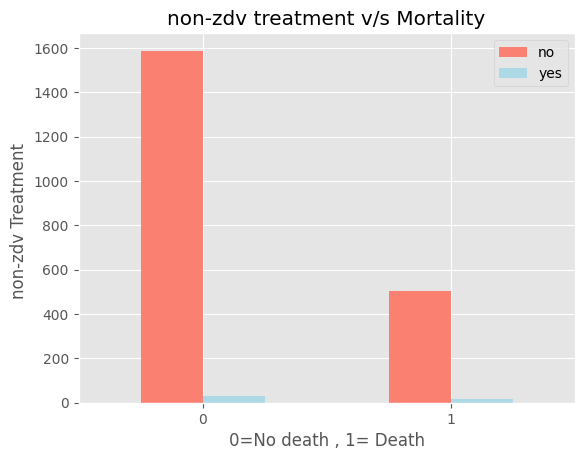

In [54]:
# Let's see the Mortality associated with non-zdv therapy before trial
pd.crosstab(df.cid, df.oprior).plot(kind='bar', color=['salmon', 'lightblue','Grey','Crimson'])
plt.title('non-zdv treatment v/s Mortality')
plt.xlabel("0=No death , 1= Death")
plt.ylabel('non-zdv Treatment ')
plt.legend(['no','yes'])
plt.xticks(rotation=0);
plt.show()

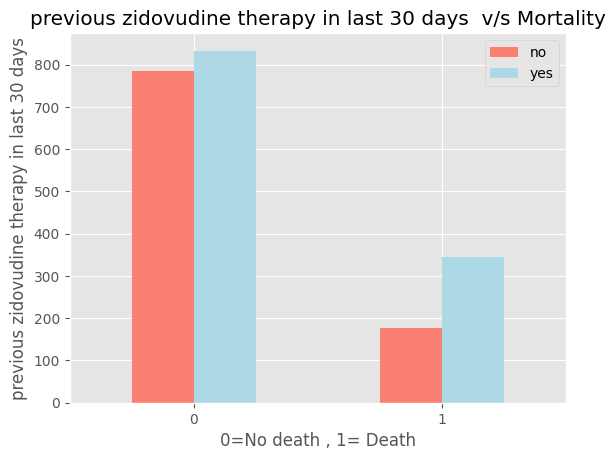

In [55]:
# Let's see the Mortality associated with zidovudine therapy in last30days before trial
pd.crosstab(df.cid, df.z30).plot(kind='bar', color=['salmon', 'lightblue','Grey','Crimson','lightgreen'])
plt.title('previous zidovudine therapy in last 30 days  v/s Mortality')
plt.xlabel("0=No death , 1= Death")
plt.ylabel('previous zidovudine therapy in last 30 days')
plt.legend(['no','yes'])
plt.xticks(rotation=0);
plt.show()

### mortality with other categorical variables 

* Karnofsky score & symptom
* Gender & race
* Hemo 
* Homo & Drugs
* cd480 ratio & cd4820 ratio
* time or preanti 


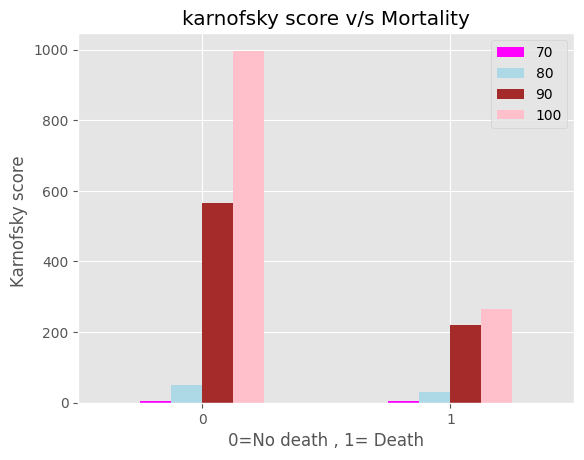

In [56]:
# Let's understand the relationship of Karnofsky score with Mortality
pd.crosstab(df.cid, df.karnof).plot(kind='bar', color=['magenta', 'lightblue','brown','pink','limegreen'])
plt.title('karnofsky score v/s Mortality')
plt.xlabel("0=No death , 1= Death")
plt.ylabel('Karnofsky score ')
plt.legend(['70','80','90','100'])
plt.xticks(rotation=0);
plt.show()

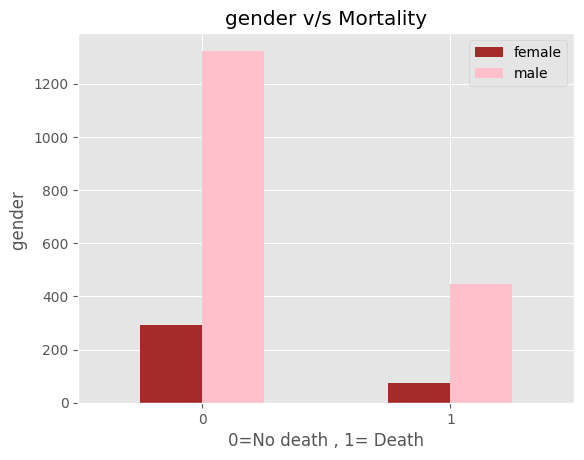

In [57]:
# Let's understand the relationship of gender with Mortality
pd.crosstab(df.cid, df.gender).plot(kind='bar', color=[ 'brown','pink','limegreen'])
plt.title('gender v/s Mortality')
plt.xlabel("0=No death , 1= Death")
plt.ylabel('gender ')
plt.legend(['female','male'])
plt.xticks(rotation=0);
plt.show()

In [58]:
df['gender'].value_counts()/df.shape[0]

gender
1    0.827957
0    0.172043
Name: count, dtype: float64

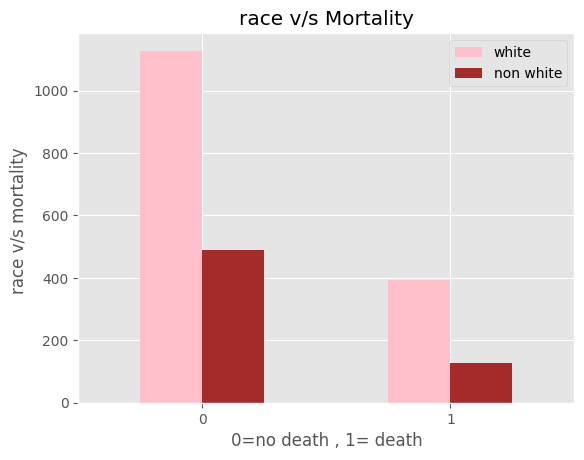

In [59]:
# Let's check the distribution of mortality in races
pd.crosstab(df.cid, df.race).plot(kind='bar', color=[ 'pink','brown'])
plt.title('race v/s Mortality')
plt.xlabel("0=no death , 1= death")
plt.ylabel('race v/s mortality ')
plt.xticks(rotation=0)
plt.legend(['white','non white'])
plt.show()

In [60]:
(pd.crosstab(df.cid, df.race)/df.shape[0])* 100

race,0,1
cid,,
0,52.734923,22.907901
1,18.419822,5.937354


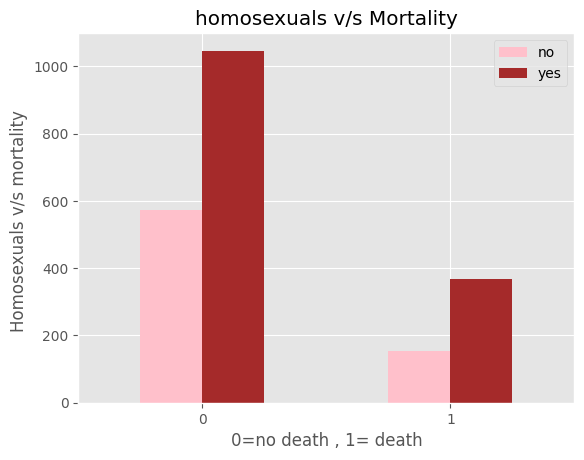

In [61]:
# Let's check the relationship of mortality with homosexual patients
pd.crosstab(df.cid, df.homo).plot(kind='bar', color=[ 'pink','brown'])
plt.title('homosexuals v/s Mortality')
plt.xlabel("0=no death , 1= death")
plt.ylabel('Homosexuals v/s mortality ')
plt.xticks(rotation=0)
plt.legend(['no','yes'])
plt.show()

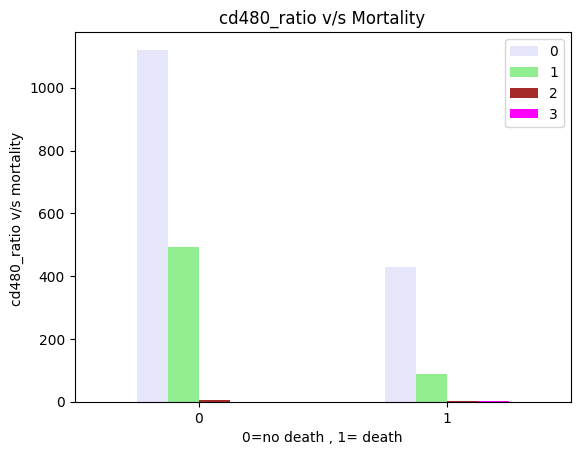

In [62]:
# Let's see the association between cd480_ratio and mortality
plt.style.use('default')
pd.crosstab(df.cid, df.cd480_ratio).plot(kind='bar', color=['lavender','lightgreen','brown','magenta'])
plt.title('cd480_ratio v/s Mortality')
plt.xlabel("0=no death , 1= death")
plt.ylabel('cd480_ratio v/s mortality ')
plt.xticks(rotation=0)
plt.legend(['0','1','2','3'])
plt.show()

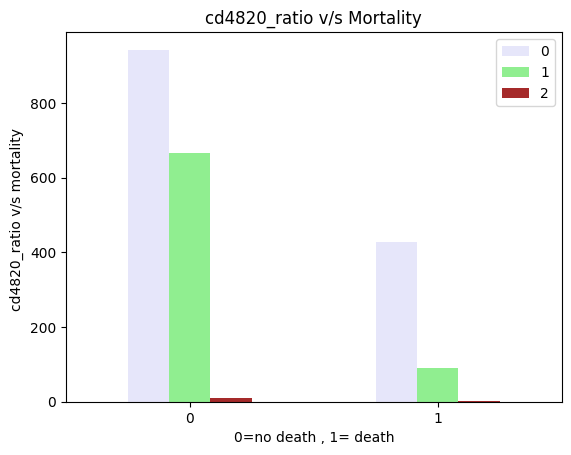

In [63]:
# Let's see the association between cd4820_ratio and mortality
plt.style.use('default')
pd.crosstab(df.cid, df.cd4820_ratio).plot(kind='bar', color=['lavender','lightgreen','brown'])
plt.title('cd4820_ratio v/s Mortality')
plt.xlabel("0=no death , 1= death")
plt.ylabel('cd4820_ratio v/s mortality ')
plt.xticks(rotation=0)
plt.legend(['0','1','2','3'])
plt.show()

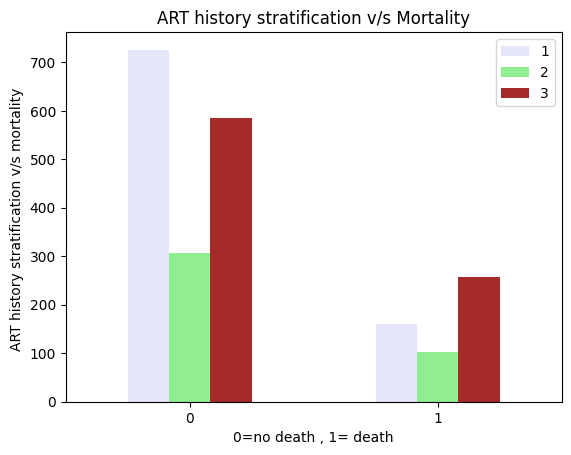

In [64]:
# Let's see the association between ART history stratification and mortality
plt.style.use('default')
pd.crosstab(df.cid, df.strat).plot(kind='bar', color=['lavender','lightgreen','brown'])
plt.title('ART history stratification v/s Mortality')
plt.xlabel("0=no death , 1= death")
plt.ylabel('ART history stratification v/s mortality ')
plt.xticks(rotation=0)
plt.legend(['1','2','3'])
plt.show()

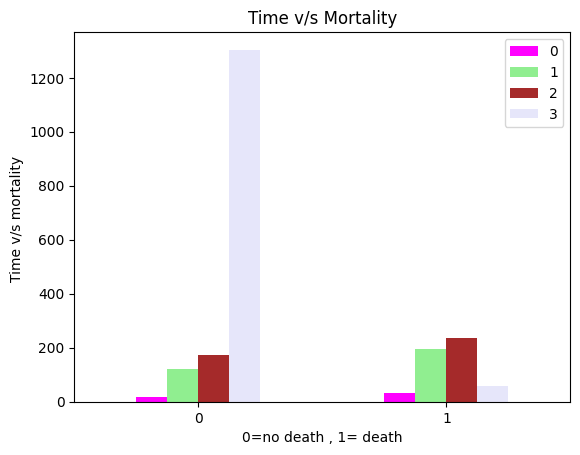

In [65]:
# Let's see the association between Time and mortality
plt.style.use('default')
pd.crosstab(df.cid, df.Time).plot(kind='bar', color=['magenta','lightgreen','brown','lavender'])
plt.title('Time v/s Mortality')
plt.xlabel("0=no death , 1= death")
plt.ylabel('Time v/s mortality ')
plt.xticks(rotation=0)
plt.legend(['0','1','2','3'])
plt.show()

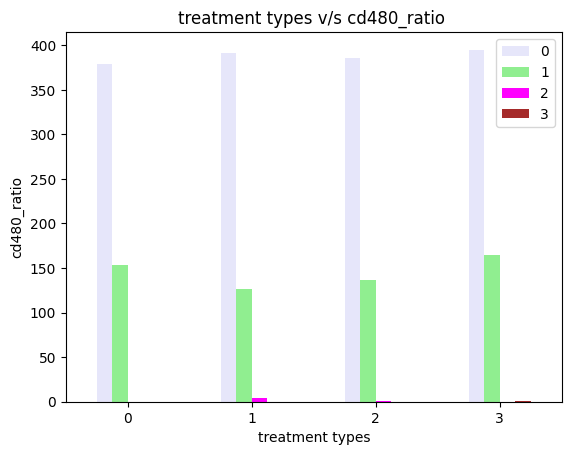

In [66]:
# Let's see the cd480_ratio in treatment types
plt.style.use('default')
pd.crosstab(df.trt, df.cd480_ratio ).plot(kind='bar', color=['lavender', 'lightgreen','magenta','brown'])
plt.title('treatment types v/s cd480_ratio ')
plt.xlabel("treatment types")
plt.ylabel('cd480_ratio')
plt.xticks(rotation=0)
plt.legend(['0','1','2','3'])
plt.show()

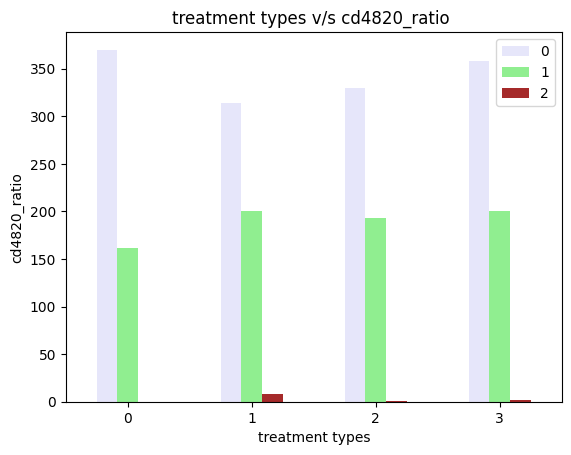

In [67]:
# Let's see the cd4820_ratio in treatment types
plt.style.use('default')
pd.crosstab(df.trt, df.cd4820_ratio ).plot(kind='bar', color=['lavender', 'lightgreen','brown'])
plt.title('treatment types v/s cd4820_ratio ')
plt.xlabel("treatment types")
plt.ylabel('cd4820_ratio')
plt.xticks(rotation=0)
plt.legend(['0','1','2','3'])
plt.show()

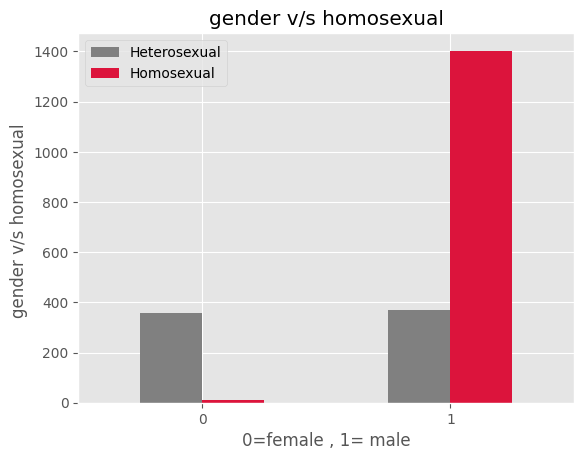

In [68]:
# Let's understand the distribution of homosexuality in both genders
plt.style.use('ggplot')
pd.crosstab(df.gender, df.homo).plot(kind='bar', color=['Grey', 'Crimson'])
plt.title('gender v/s homosexual')
plt.xlabel("0=female , 1= male")
plt.ylabel('gender v/s homosexual ')
plt.xticks(rotation=0)
plt.legend(['Heterosexual','Homosexual'])
plt.show()

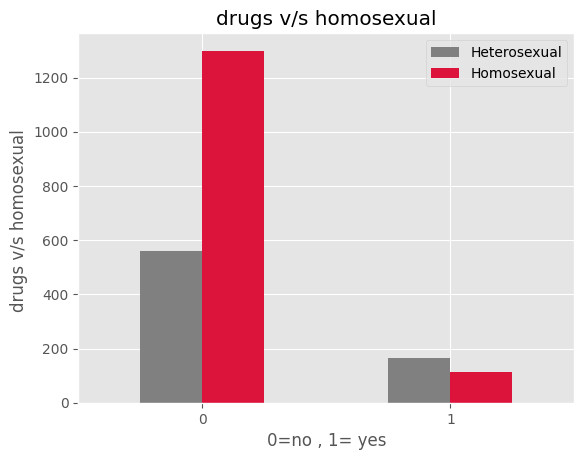

In [69]:
plt.style.use('ggplot')
pd.crosstab(df.drugs, df.homo).plot(kind='bar', color=['Grey', 'Crimson'])
plt.title('drugs v/s homosexual')
plt.xlabel("0=no , 1= yes")
plt.ylabel('drugs v/s homosexual ')
plt.xticks(rotation=0)
plt.legend(['Heterosexual','Homosexual'])
plt.show()

## Insights from bivariate analysis 
* cd40 and cd80 counts have slight positive correlation
* cd420 and cd820 also have slight positive correlation
* Most subjects' cd40 count increased after 1000 days of participation in trial
* Subjects who had taken zidovudine therapy 30 days prior to trial are likely to die than those who had not taken
* cd480 and cd4820 ratio were highest in zdv+ddi, second highest in ddi only group,and least in zdv only group indicating the efficacy of the treatment
* Subjects with Hemophilia were likely to die than those without it
*  Most of the censoring or dying was observed between 200th and  1000th day, while the most who were alive remained in the trial until 1200 days.
* Those who had not taken ART before the trial are less likely to die than those who were on ART 

## Multivariate analysis 

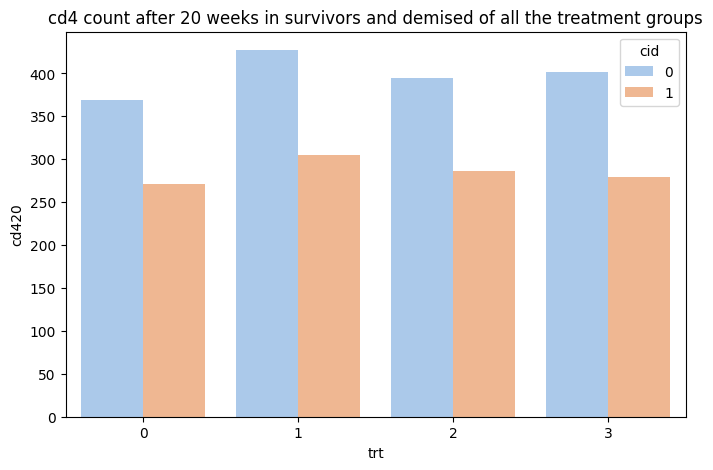

In [70]:
# Let's see the how cd420 changes with mortality in different treatment groups
plt.figure(figsize=[8,5])
plt.style.use('default')
sns.barplot(x='trt', y='cd420', hue='cid', data=df, ci=None, palette='pastel')
plt.title('cd4 count after 20 weeks in survivors and demised of all the treatment groups')
plt.show()

Text(0.5, 1.0, 'Distribution of demised and survived  patients based on their age and cd40 count \n')

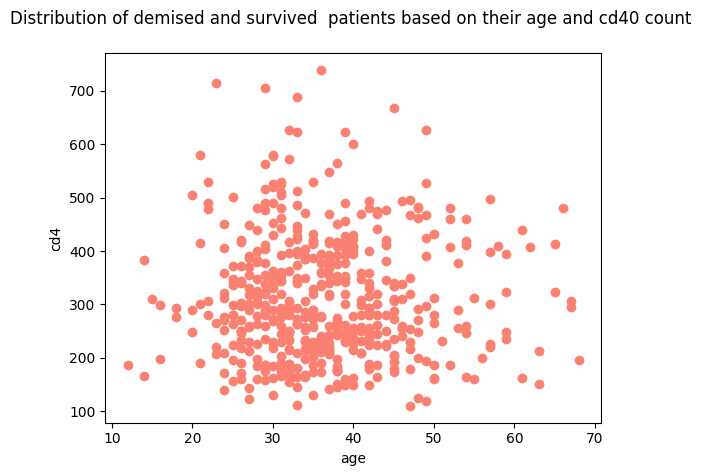

In [71]:
# Checking the age and cd40 pattern in demised patients
plt.scatter(df.age[df.cid==1],
          df.cd40[df.cid==1], c='Salmon')
plt.xlabel('age')
plt.ylabel('cd4')
plt.title('Distribution of demised and survived  patients based on their age and cd40 count \n')

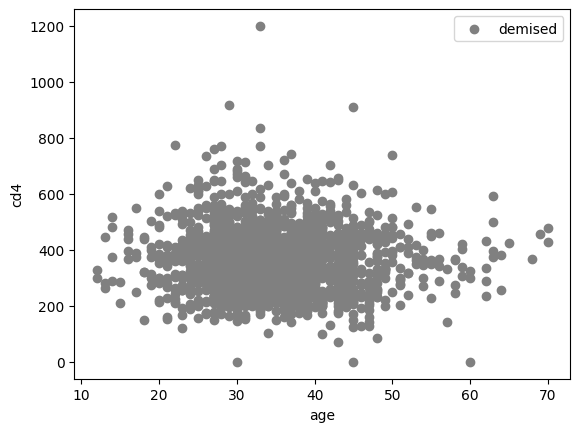

In [72]:
# Checking the age and cd40 pattern in living patients
plt.scatter(df.age[df.cid==0],
          df.cd40[df.cid==0], c='Grey')
plt.xlabel('age')
plt.ylabel('cd4')
plt.legend(['demised','survived'])
plt.show()

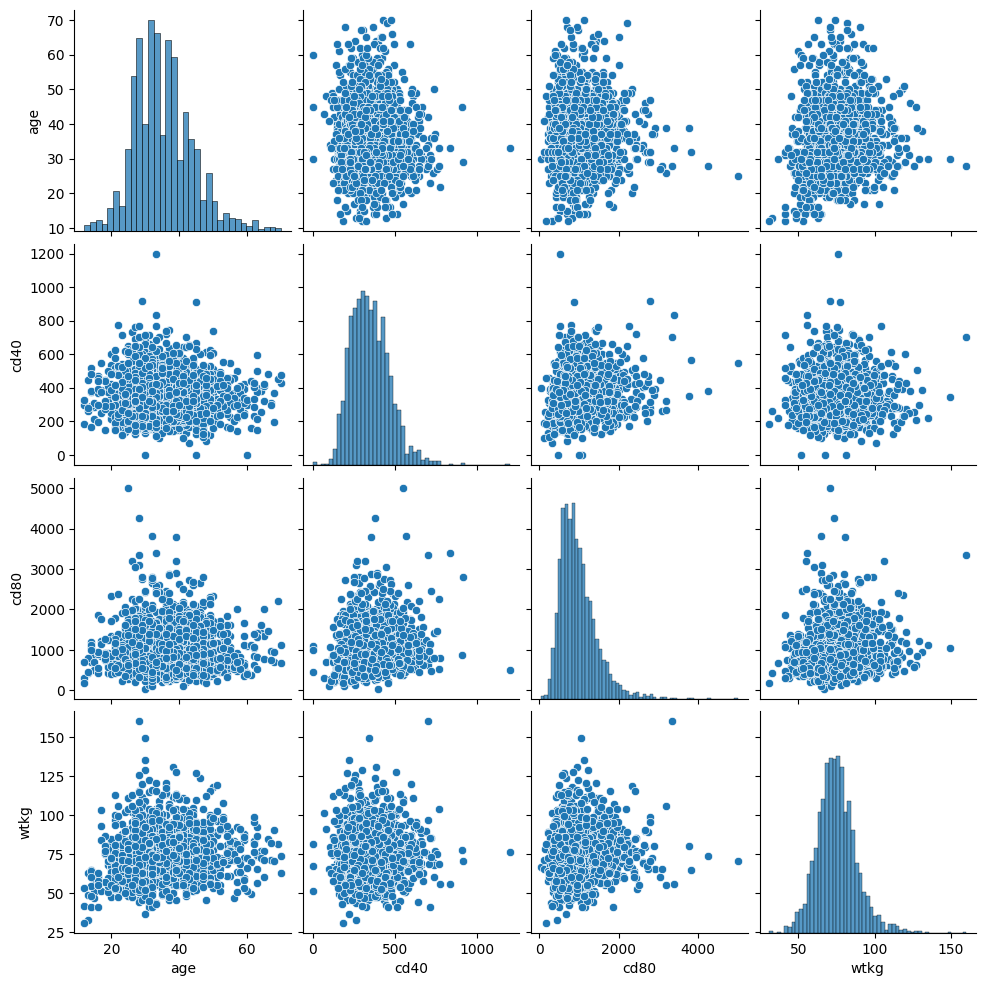

In [73]:
#age v.s cd40,v.s  cd80 v.s wtkg
plt.figure
sns.pairplot(data=df, vars=['age','cd40','cd80','wtkg'])
plt.show()

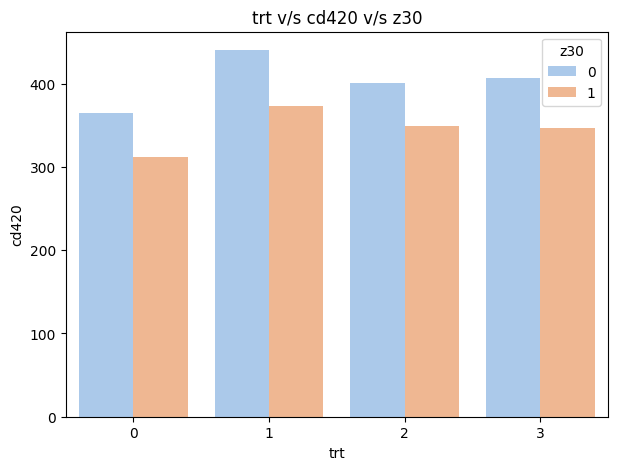

In [74]:
# Let's see the how cd420 changes with previous zidovudine treatment in last 30 days before trial in different treatment groups
plt.figure(figsize=[7,5])
plt.style.use('default')
sns.barplot(x='trt', y='cd420', hue='z30', data=df, ci=None, palette='pastel')
plt.title('trt v/s cd420 v/s z30')
plt.show()

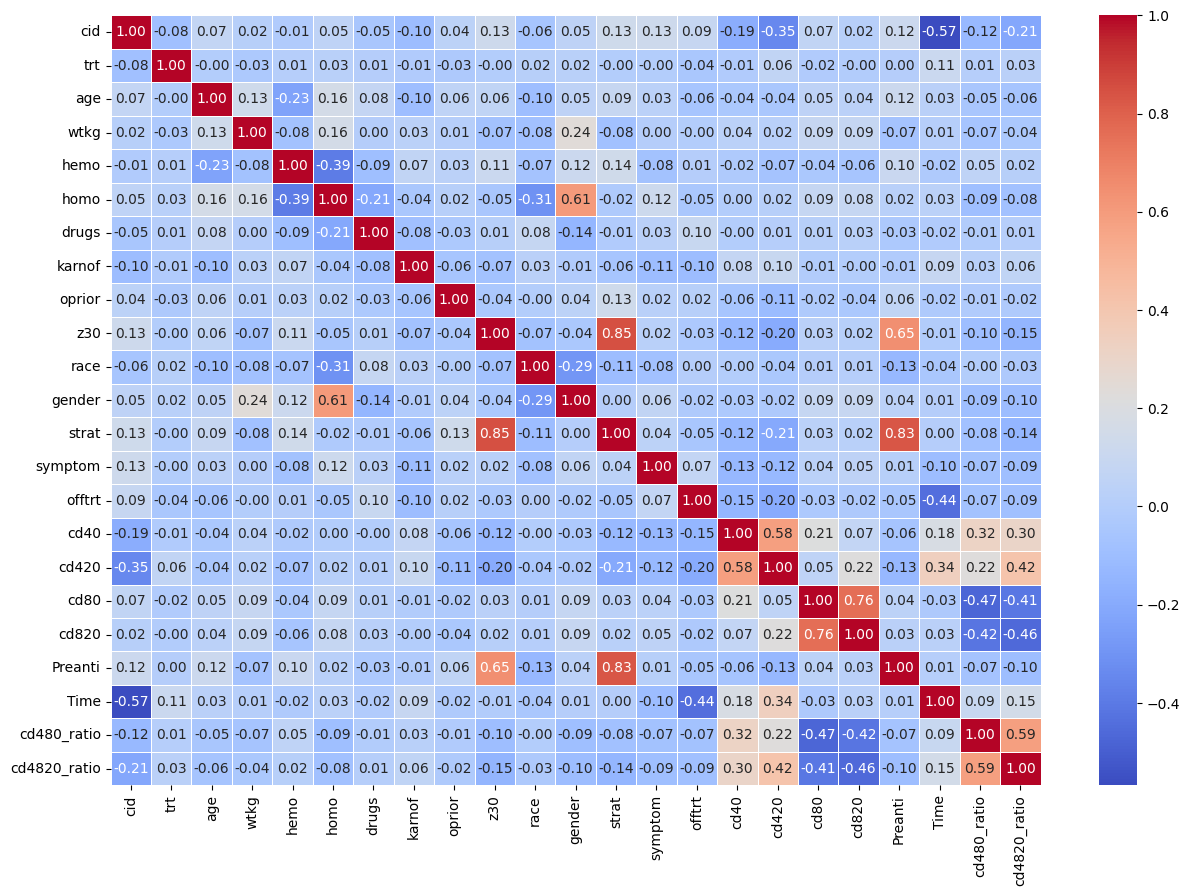

In [75]:
# Creating a heatmap to know the correlations
corr_matrix=df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap='coolwarm')

#### Insights
* Since we already have cd4 and cd8 ratios at 2 intervals, having cd4 and cd8 counts at baseline will be repetitive
* We can see from the heatmap that the cd4 counts and cd4/cd8 ratios are highly correlated
* However we are going to drop only the cd4 and cd8 counts at baseline but not the counts after 20 weeks as they are significant

In [76]:
# Dropping the cd4 and cd8 counts at baseline
df= df.drop(['cd40','cd80'], axis=1)
df.columns

Index(['cid', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'race', 'gender', 'strat', 'symptom', 'offtrt',
       'cd420', 'cd820', 'Preanti', 'Time', 'cd480_ratio', 'cd4820_ratio'],
      dtype='object')

## OUTLIER TREATMENT

### Winsorization

In [77]:
# Creating thresholds 
low_threshold = df.quantile(0.05)
high_threshold = df.quantile(0.95)

df[['age','wtkg','cd420','cd820']] = df[['age','wtkg','cd420','cd820']].clip(lower=low_threshold, upper=high_threshold, axis=1)

print(df[['age','wtkg','cd420','cd820']])

      age       wtkg  cd420   cd820
0      48  89.812800  477.0   399.9
1      50  55.483920  218.0   564.0
2      45  88.452000  274.0  1742.8
3      47  85.276800  394.0   966.0
4      43  66.679200  353.0   782.0
...   ...        ...    ...     ...
2134   23  55.483920  163.9   720.0
2135   23  97.888192  218.0  1030.0
2136   50  69.854400  364.0  1041.0
2137   23  60.000000  169.0  1742.8
2138   45  77.300000  618.1   526.0

[2139 rows x 4 columns]


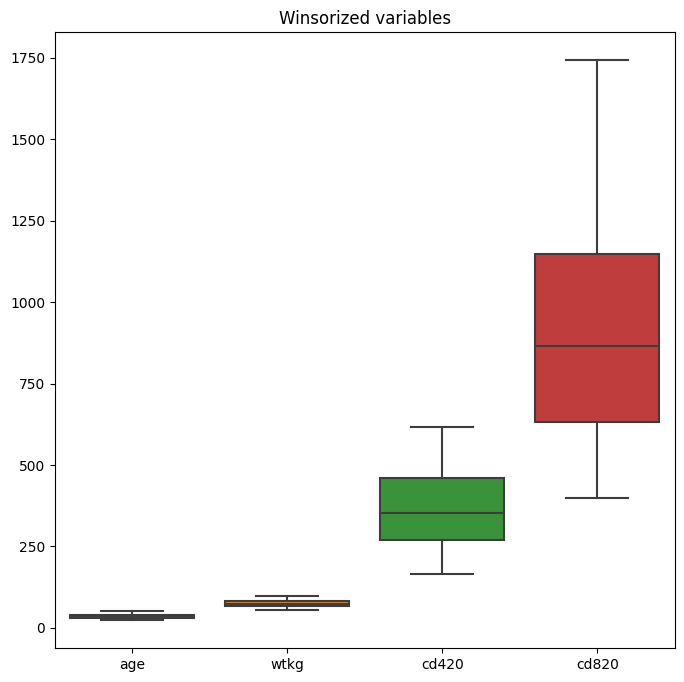

In [78]:
# Plotting the winsorized data to check the presence of outliers
plt.figure(figsize=(8,8))
plt.title('Winsorized variables')
sns.boxplot(df[['age','wtkg','cd420','cd820']])
plt.show()

## FEATURE ENGINEERING

### Creating dummy variables

In [79]:
# Let's create dummy variables for the categorical variables with multiple levels
dummy1=pd.get_dummies(df, columns = ['trt','strat','karnof','cd480_ratio','cd4820_ratio','Time'], drop_first=True)
dummy1.replace({True:1, False:0},inplace=True)
dummy1.head()

,cid,age,wtkg,hemo,homo,drugs,oprior,z30,race,gender,...,karnof_90,karnof_100,cd480_ratio_1.0,cd480_ratio_2.0,cd480_ratio_3.0,cd4820_ratio_1.0,cd4820_ratio_2.0,Time_1.0,Time_2.0,Time_3.0
0,0,48,89.81280,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
1,1,50,55.48392,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,45,88.45200,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,47,85.27680,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,43,66.67920,0,1,0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,1


In [80]:
#merge the dummy1 variables with the original dataset
df = pd.concat([df, dummy1[['trt_1',
       'trt_2', 'trt_3', 'strat_2', 'strat_3', 'karnof_80', 'karnof_90',
       'karnof_100','cd480_ratio_1.0','cd480_ratio_2.0','cd480_ratio_3.0','cd4820_ratio_1.0','cd4820_ratio_2.0', 'Time_1.0', 'Time_2.0','Time_3.0']]], axis=1)

# Dropping the original columns from the dataset
df = df.drop(['strat','trt','karnof','cd480_ratio','cd4820_ratio', 'Time'], axis=1)
df.columns

Index(['cid', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'oprior', 'z30', 'race',
       'gender', 'symptom', 'offtrt', 'cd420', 'cd820', 'Preanti', 'trt_1',
       'trt_2', 'trt_3', 'strat_2', 'strat_3', 'karnof_80', 'karnof_90',
       'karnof_100', 'cd480_ratio_1.0', 'cd480_ratio_2.0', 'cd480_ratio_3.0',
       'cd4820_ratio_1.0', 'cd4820_ratio_2.0', 'Time_1.0', 'Time_2.0',
       'Time_3.0'],
      dtype='object')

### SPLITTING THE DATASET

In [81]:
## SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X = df.drop(['cid'], axis=1)
y = df['cid']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3)
X_train.head()

,age,wtkg,hemo,homo,drugs,oprior,z30,race,gender,symptom,...,karnof_90,karnof_100,cd480_ratio_1.0,cd480_ratio_2.0,cd480_ratio_3.0,cd4820_ratio_1.0,cd4820_ratio_2.0,Time_1.0,Time_2.0,Time_3.0
816,38,75.1000,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
187,37,64.8000,0,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
619,50,68.4936,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1855,40,77.1120,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
158,27,91.6000,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


## DATA BALANCING

In [82]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [83]:
df['cid'].value_counts()

cid
0    1618
1     521
Name: count, dtype: int64

* As we can see the target variable has 75% of class '0' and remaining 25% of class'1'
* To balance this we will use SMOTE technique, so that it balances and oversamples the dataset

In [84]:
## DATA BALANCING USING SMOTE TECHNIQUE

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
y_train.value_counts()

cid
0    1132
1    1132
Name: count, dtype: int64

### Data scaling 

In [85]:
num_cols = X_train[['wtkg','cd420','cd820','age']]
num_cols_test = X_test[['wtkg','cd420','cd820','age']]


from sklearn.preprocessing import MinMaxScaler

# Initialize the Scaler
scaler = MinMaxScaler()

# Fit and Transform
X_train[['wtkg','cd420','cd820','age']] = scaler.fit_transform(num_cols)
X_test[['wtkg','cd420','cd820','age']] = scaler.transform(num_cols_test)

X_train.head()

,age,wtkg,hemo,homo,drugs,oprior,z30,race,gender,symptom,...,karnof_90,karnof_100,cd480_ratio_1.0,cd480_ratio_2.0,cd480_ratio_3.0,cd4820_ratio_1.0,cd4820_ratio_2.0,Time_1.0,Time_2.0,Time_3.0
0,0.555556,0.462597,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0.518519,0.219697,0,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.000000,0.306801,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.629630,0.510045,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0.148148,0.851709,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


## FEATURE SELECTION METHODS


### SelectKBest method

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

skb = SelectKBest(score_func=chi2, k=20)
best_feature_fit = skb.fit(X_train, y_train)

print(best_feature_fit.scores_)

[4.06821787e-01 3.39980861e-01 3.05079365e+01 3.95664740e+00
 5.28549223e+01 3.10344828e-01 4.16523236e-01 1.21793177e+02
 3.47415231e-01 2.99003322e-02 2.74220963e+00 8.72703200e+01
 9.81385950e-01 5.56818249e+01 8.02274882e+01 8.40971129e+01
 6.47076566e+01 6.30622837e+01 3.01568154e-02 1.69491525e-02
 1.27652051e+01 9.95093633e+01 1.01266667e+02 1.80000000e+00
            nan 1.30664537e+02 8.00000000e+00 9.15254237e+01
 9.22521739e+01 7.77881427e+02]


In [87]:
bf_02 = best_feature_fit.transform(X_train)
bf_02

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [88]:
# Mapping to the features
feature_score = pd.DataFrame(best_feature_fit.scores_ , columns = ['feature_scores'])

feature_col_names = pd.DataFrame(X_train.columns, columns = ['feature_name'])
best_feat_df = pd.concat([feature_score, feature_col_names], axis=1)

best_feat_df.nlargest(20, 'feature_scores')

,feature_scores,feature_name
29,777.881427,Time_3.0
25,130.664537,cd4820_ratio_1.0
7,121.793177,race
22,101.266667,cd480_ratio_1.0
21,99.509363,karnof_100
28,92.252174,Time_2.0
27,91.525424,Time_1.0
11,87.270320,cd420
15,84.097113,trt_2
14,80.227488,trt_1


### Extra tree classifier

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier()
et_clf.fit(X_train, y_train)


# Print important features
print(et_clf.feature_importances_)

[0.02925175 0.0304723  0.01130321 0.01390233 0.00894421 0.00276386
 0.01257553 0.04032225 0.00998593 0.0117146  0.04580057 0.07394195
 0.03163478 0.02691971 0.02193935 0.02262978 0.02146466 0.0137639
 0.01121782 0.00359372 0.02781192 0.04029885 0.01473336 0.00068212
 0.         0.02899757 0.00046152 0.02184355 0.03114194 0.38988694]


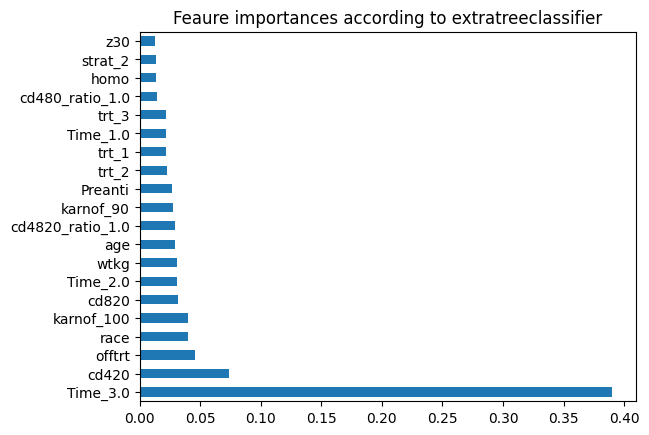

In [90]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index=X_train.columns)
feature_importance_df.nlargest(20).plot(kind='barh')
plt.title('Feaure importances according to extratreeclassifier')
plt.show()

## Recursive feature elimination (RFE)

In [91]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

rfe.support_

array([False, False,  True, False,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
        True,  True,  True])

In [92]:
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

[('age', False, 8),
 ('wtkg', False, 10),
 ('hemo', True, 1),
 ('homo', False, 5),
 ('drugs', True, 1),
 ('oprior', True, 1),
 ('z30', True, 1),
 ('race', True, 1),
 ('gender', False, 6),
 ('symptom', False, 4),
 ('offtrt', True, 1),
 ('cd420', True, 1),
 ('cd820', True, 1),
 ('Preanti', False, 3),
 ('trt_1', True, 1),
 ('trt_2', True, 1),
 ('trt_3', True, 1),
 ('strat_2', True, 1),
 ('strat_3', False, 2),
 ('karnof_80', True, 1),
 ('karnof_90', True, 1),
 ('karnof_100', True, 1),
 ('cd480_ratio_1.0', False, 9),
 ('cd480_ratio_2.0', True, 1),
 ('cd480_ratio_3.0', False, 11),
 ('cd4820_ratio_1.0', True, 1),
 ('cd4820_ratio_2.0', False, 7),
 ('Time_1.0', True, 1),
 ('Time_2.0', True, 1),
 ('Time_3.0', True, 1)]

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['hemo', 'drugs', 'oprior', 'z30', 'race', 'offtrt', 'cd420', 'cd820',
       'trt_1', 'trt_2', 'trt_3', 'strat_2', 'karnof_80', 'karnof_90',
       'karnof_100', 'cd480_ratio_2.0', 'cd4820_ratio_1.0', 'Time_1.0',
       'Time_2.0', 'Time_3.0'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['age', 'wtkg', 'homo', 'gender', 'symptom', 'Preanti', 'strat_3',
       'cd480_ratio_1.0', 'cd480_ratio_3.0', 'cd4820_ratio_2.0'],
      dtype='object')

## Logistic regression

In [95]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train[col], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[col])

In [96]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
lr_acc = accuracy_score(y_test, y_pred)
lr_pre = precision_score(y_test,y_pred)
lr_rec = recall_score(y_test,y_pred)
lr_f1 = f1_score(y_test,y_pred)
lr_roc = roc_auc_score(y_test,y_pred)

In [97]:
print(lr_acc)
print(lr_roc)

0.883177570093458
0.8357866413421969


In [99]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[451  35]
 [ 40 116]]


## Hyperparameter tuning-LR

### 1. Randomizedsearchcv

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

model = LogisticRegression(solver='liblinear')

# Define hyperparameters for Randomized Search
param_dist = {
    'penalty': ['l1', 'l2'],                     # Regularization type
    'C': uniform(0.01, 100),                     # Random distribution of regularization strength
    'solver': ['liblinear', 'saga'],             # Solvers compatible with 'l1' penalty
    'max_iter': [100, 200, 300]                  # Maximum iterations
}

# Setup the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, 
                                   scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train[col], y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8a713433a0>,
                                        'max_iter': [100, 200, 300],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy')

In [96]:
from sklearn.metrics import accuracy_score, classification_report
# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Evaluate the model
y_pred = random_search.predict(X_test[col])

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 0.5622117123602399, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9068208013440386
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       486
           1       0.75      0.72      0.74       156

    accuracy                           0.88       642
   macro avg       0.83      0.82      0.83       642
weighted avg       0.87      0.88      0.87       642



### Gridsearchcv - LR

In [97]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Grid Search
param_grid = {
    'penalty': ['l1', 'l2'],               # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'solver': ['liblinear', 'saga'],       # Solvers compatible with 'l1' penalty
    'max_iter': [100, 200, 300]           # Maximum iterations
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train[col], y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [98]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the model
y_pred = grid_search.predict(X_test[col])

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Score: 0.9063802770126393
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       486
           1       0.78      0.76      0.77       156

    accuracy                           0.89       642
   macro avg       0.85      0.84      0.85       642
weighted avg       0.89      0.89      0.89       642



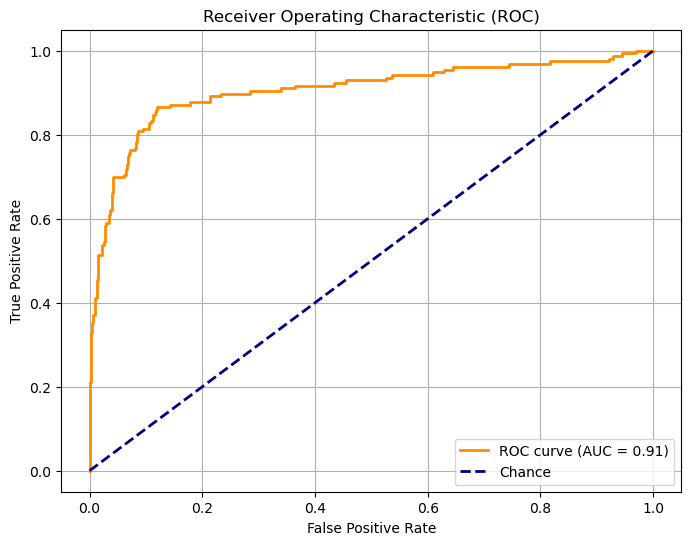

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#let's fit the xgb model with trainsets
model.fit(X_train[col], y_train)

# create y_probability
y_probs = model.predict_proba(X_test[col])[:, 1]

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Inference: 

* When we tuned the LR with gridsearchcv of cv=5 & 10 , without choosing the features from rfe, the accuracy of the test set increased by 1 i.e, 0.89. But when tuned with randomsearchcv it did not change it was still 0.88.

* When we tuned the LR with gridsearchcv of cv=5 & 10 , with rfe features, the accuracy of the test set did not increase at all same for randomsearchcv.

## Randomforest

In [142]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train[col], y_train)

RandomForestClassifier(random_state=42)

In [143]:
# Predict on the test set
y_pred = rf_model.predict(X_test[col])

## Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.89
Confusion Matrix:
[[456  30]
 [ 42 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       486
           1       0.79      0.73      0.76       156

    accuracy                           0.89       642
   macro avg       0.85      0.83      0.84       642
weighted avg       0.89      0.89      0.89       642



In [144]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
rf_acc = accuracy_score(y_test, y_pred)
rf_pre = precision_score(y_test,y_pred)
rf_rec = recall_score(y_test,y_pred)
rf_f1 = f1_score(y_test,y_pred)
rf_roc = roc_auc_score(y_test,y_pred)

### Hyperparameter tuning - RF

#### Randomized search

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200, 500),              # Random distribution for number of trees
    'max_depth': [None, 10, 20, 30, 40, 50],            # List of possible depths
    'min_samples_split': randint(2, 20),            # Random range for min_samples_split
    'min_samples_leaf': randint(1, 20),              # Random range for min_samples_leaf
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],                     # Whether to use bootstrap samples
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5,
                                   scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train[col], y_train)

In [110]:
# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Evaluate the model
y_pred = random_search.predict(X_test[col])

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'bootstrap': True, 'max_depth': 50, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 577}
Best Cross-Validation Score: 0.9156527769638009
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       486
           1       0.80      0.71      0.76       156

    accuracy                           0.89       642
   macro avg       0.86      0.83      0.84       642
weighted avg       0.88      0.89      0.89       642



### Gridsearch -RF

In [145]:
from sklearn.model_selection import GridSearchCV
# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200,300],                 # Number of trees
    'max_depth': [10, 20, None],                     # Maximum depth of trees
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 5],                   # Minimum samples required to be at a leaf node
    'bootstrap': [True, False],                      # Whether bootstrap samples are used when building trees
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train[col], y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [146]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
best_model = random_search.best_estimator_

# Evaluate the model
y_pred = grid_search.predict(X_test[col])

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.9160972083846138
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       486
           1       0.81      0.74      0.77       156

    accuracy                           0.89       642
   macro avg       0.86      0.84      0.85       642
weighted avg       0.89      0.89      0.89       642



Test ROC AUC: 0.9074733565474307


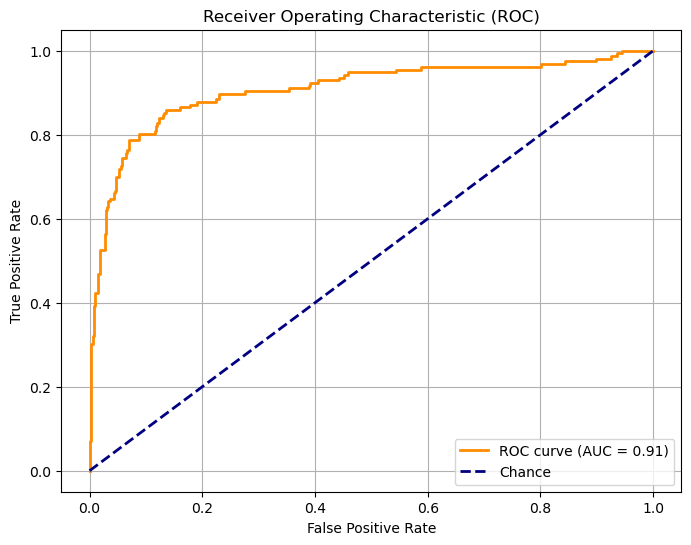

In [147]:
# Let's prlot roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Test set evaluation
y_pred = best_model.predict(X_test[col])
y_prob = best_model.predict_proba(X_test[col])[:, 1]

print("Test ROC AUC:", roc_auc_score(y_test, y_prob))

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [148]:
# Let's plot the important features chosen by of randomforest
importances = rf_model.feature_importances_
feature_names = X[col].columns

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_features = feature_importance_df.head(20)  # Top 10 features
print(top_features)

             Feature  Importance
19          Time_3.0    0.409884
6              cd420    0.165872
7              cd820    0.082637
5             offtrt    0.044818
4               race    0.039691
15        karnof_100    0.036096
18          Time_2.0    0.030230
16  cd4820_ratio_1.0    0.026945
14         karnof_90    0.020369
17          Time_1.0    0.020271
9              trt_2    0.019830
10             trt_3    0.017316
8              trt_1    0.016975
11           strat_2    0.014377
0               hemo    0.013864
3                z30    0.013353
12           strat_3    0.011690
1              drugs    0.009972
13         karnof_80    0.002930
2             oprior    0.002880


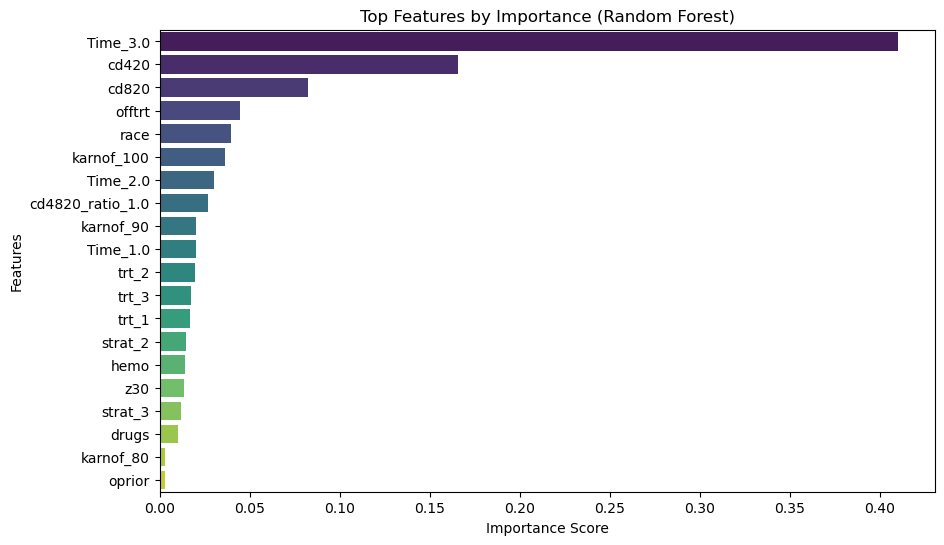

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=top_features, 
    palette='viridis'
)
plt.title('Top Features by Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#### Insights

* When randomsearchcv used for all the features of RF, no increase in accuracy at cv=5,at cv=10 and increasing n_estimators&max_depth the accuracy
* When randomsearchcv used for rfe selected features of RF,no increase in acccuracy at cv=5

## Support Vector Classifier (SVC)

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

svc = SVC()

# Fit the model to the training data
svc.fit(X_train[col], y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test[col])

In [119]:
## Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.88
Confusion Matrix:
[[460  26]
 [ 49 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       486
           1       0.80      0.69      0.74       156

    accuracy                           0.88       642
   macro avg       0.85      0.82      0.83       642
weighted avg       0.88      0.88      0.88       642



In [120]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
svc_acc = accuracy_score(y_test, y_pred)
svc_pre = precision_score(y_test,y_pred)
svc_rec = recall_score(y_test,y_pred)
svc_f1 = f1_score(y_test,y_pred)
svc_roc = roc_auc_score(y_test,y_pred)

### Hyperparameter tuning - svc

#### Randomizedsearch 

In [121]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 100),               # Uniform distribution for C
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel types
    'gamma': ['scale', 'auto'],            # Kernel coefficient
    'degree': [2, 3, 4],                   # Degree for polynomial kernel
    'coef0': uniform(0, 1)                 # Independent term for 'poly' and 'sigmoid'
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist, n_iter=100, cv=5,
                                   scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train[col], y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8a701af0d0>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8a713914e0>,
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='accuracy')

In [122]:
# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Evaluate the model on the test set
y_pred = random_search.predict(X_test[col])

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 96.2172024349349, 'coef0': 0.8445338486781514, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Score: 0.9130067006583445
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       486
           1       0.77      0.70      0.73       156

    accuracy                           0.88       642
   macro avg       0.84      0.82      0.83       642
weighted avg       0.87      0.88      0.87       642



### Gridsearch

In [123]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel types
    'gamma': ['scale', 'auto'],         # Kernel coefficient
    'degree': [2, 3],                   # Degree for polynomial kernel
    'coef0': [0, 0.1, 0.5]              # Independent term for 'poly' and 'sigmoid'
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


# Fit the model
grid_search.fit(X_train[col], y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0, 0.1, 0.5],
                         'degree': [2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [124]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


# Evaluate the model on the test set
y_pred = grid_search.predict(X_test[col])
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'C': 100, 'coef0': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Score: 0.9147736818457091
Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       486
           1       0.78      0.71      0.74       156

    accuracy                           0.88       642
   macro avg       0.84      0.82      0.83       642
weighted avg       0.88      0.88      0.88       642



In [125]:
from sklearn.metrics import roc_auc_score
# Test set evaluation
y_pred = best_model.predict(X_test[col])
y_prob = best_model.predict_proba(X_test[col])[:, 1]

print("Test ROC AUC:", roc_auc_score(y_test, y_prob))

Test ROC AUC: 0.9042682283423024


#### Insights
* for outlier treated all features of cv=5, the accuracy was 0.90 in both ranomsearch and gridsearch
* for cv=10 the accuracy was 0.88
* for rfe chosen features of cv=5, the accuracy was 0.89 in both randomsearch and gridsearch
* for cv=10 the accuracy was 0.89

## XGBoost classifier

In [130]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [131]:
import xgboost as xgb

X_train['Preanti'] = X_train['Preanti'].astype('category')
X_test['Preanti'] = X_test['Preanti'].astype('category')

# Create XGBoost model with categorical support enabled
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    enable_categorical=True  # Enable handling of categorical data
)

# Train the model
xgb_model.fit(X_train[col], y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [132]:
# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
  	  n_estimators=100,     # Number of trees
  	  learning_rate=0.1,    # Step size shrinkage
  	  max_depth=3,          # Maximum depth of trees
    random_state=42,
    enable_categorical=True
)

# Train the model
xgb_model.fit(X_train[col], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [133]:
# Predict on the test set
y_pred = xgb_model.predict(X_test[col])

## Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.89
Confusion Matrix:
[[460  26]
 [ 42 114]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       486
           1       0.81      0.73      0.77       156

    accuracy                           0.89       642
   macro avg       0.87      0.84      0.85       642
weighted avg       0.89      0.89      0.89       642



In [134]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
xgb_acc = accuracy_score(y_test, y_pred)
xgb_pre = precision_score(y_test,y_pred)
xgb_rec = recall_score(y_test,y_pred)
xgb_f1 = f1_score(y_test,y_pred)
xgb_roc = roc_auc_score(y_test,y_pred)

### Hyperparameter tuning

#### Randomizedsearch 

In [135]:
from scipy.stats import uniform

# Define hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5,
                                   scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train[col], y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux201

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8a6b3ed3c0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8a6b505450>,
                                        'max_depth': [3, 6, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8a6b3ed450>},
                   random_state=42, scoring='accuracy')

In [136]:
# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Evaluate on the test set
y_pred = random_search.predict(X_test[col])

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'colsample_bytree': 0.7351503172230192, 'gamma': 0.4917115704474215, 'learning_rate': 0.08976488848891061, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.6603900324858679}
Best Cross-Validation Score: 0.9222801773818594
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       486
           1       0.82      0.72      0.76       156

    accuracy                           0.89       642
   macro avg       0.87      0.83      0.85       642
weighted avg       0.89      0.89      0.89       642



### Gridsearch

In [137]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
y_pred = grid_search.predict(X_test[col])

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Score: 0.9160972083846138
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       486
           1       0.81      0.74      0.77       156

    accuracy                           0.89       642
   macro avg       0.86      0.84      0.85       642
weighted avg       0.89      0.89      0.89       642



#### Insights
* For outlier treated all features of xgb the accuracy after tuning with cv=5 for randomizedsearch was 0.80 and gridsearch was 0.84
* For outlier treated rfe features of xgb the accuracy before tuning was 0.89 after tuning with cv=5 for randomizedsearch was 0.88 and gridsearch was 0.89

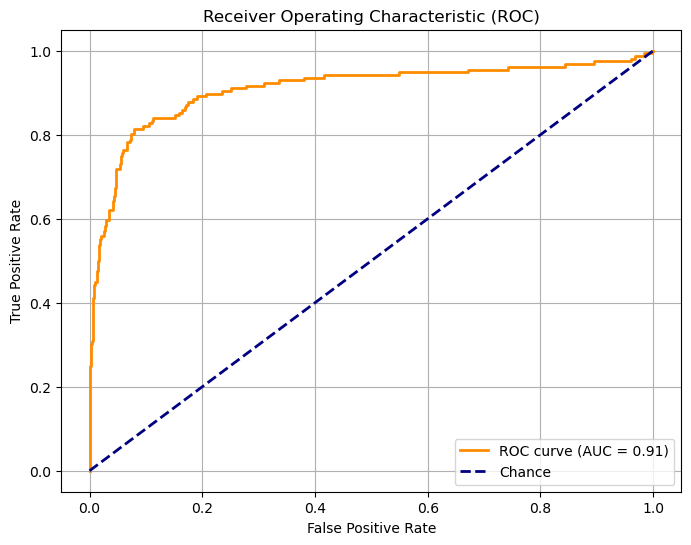

In [139]:
#let's fit the xgb model with trainsets
xgb_model.fit(X_train[col], y_train)

# create y_probability
y_probs = xgb_model.predict_proba(X_test[col])[:, 1]

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

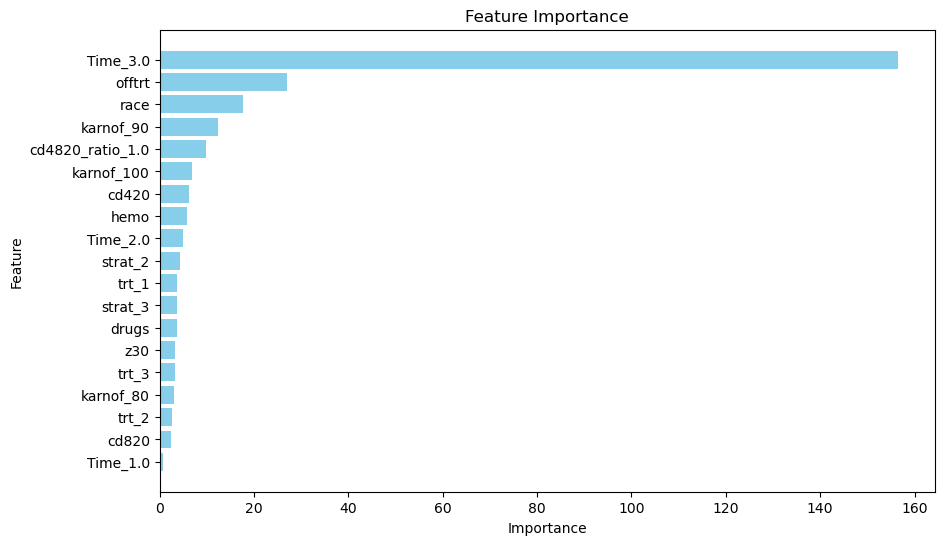

In [140]:
# Extract feature importance
feature_importance = xgb_model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame(
    {'Feature': feature_importance.keys(), 'Importance': feature_importance.values()}
)

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

## comparing the performance of all the models based on their metrics 

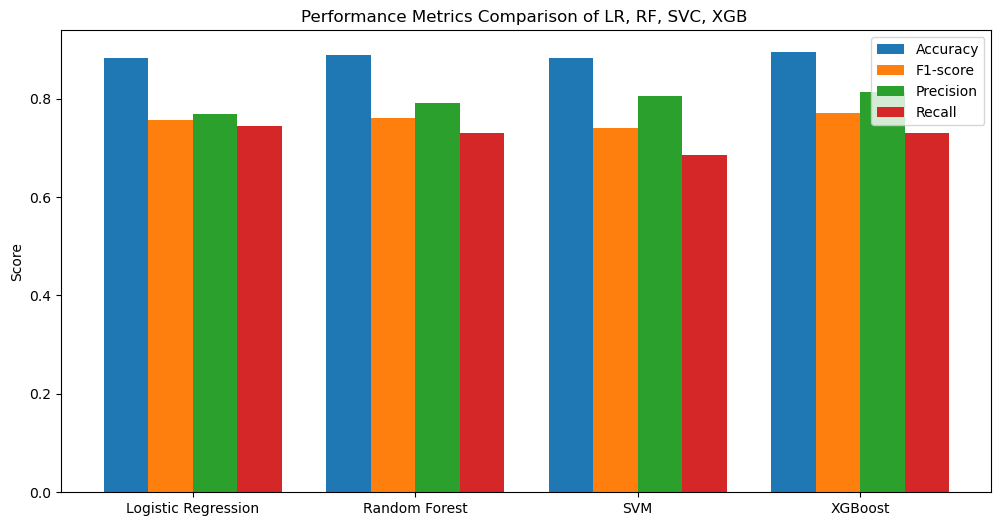

In [141]:
metrics = {
    "Accuracy": [lr_acc, rf_acc, svc_acc, xgb_acc],
    "F1-score": [lr_f1, rf_f1, svc_f1, xgb_f1],
    "Precision": [lr_pre, rf_pre, svc_pre,xgb_pre],
    "Recall": [lr_rec, rf_rec, svc_rec, xgb_rec],
}

models = ["Logistic Regression", "Random Forest", "SVM", "XGBoost"]
x = np.arange(len(models))  # X-axis

plt.figure(figsize=(12, 6))
bar_width = 0.2

# Plotting each metric as a separate bar group
for i, (metric_name, values) in enumerate(metrics.items()):
    plt.bar(x + i * bar_width, values, width=bar_width, label=metric_name)

plt.xticks(x + bar_width * (len(metrics) / 2 - 0.5), models)
plt.ylabel("Score")
plt.title("Performance Metrics Comparison of LR, RF, SVC, XGB ")
plt.legend()
plt.show()